## ЦЕЛЬ: создать модель предсказания того, уйдёт ли аббонент в отток(church)

## Информация об атрибутах приведена ниже:

- Customer ID - уникальный номер клиента
- gender - пол
- SeniorCitizen - является ли клиент пенсионером или нет (1, 0)
- Partner - имеется ли у клиента партнер (Да, Нет)
- Dependents - имеет ли клиент иждивенцев или нет (Да, Нет)
- tenure - количество месяцев, которое клиент провел в компании
- PhoneService - имеет ли клиент телефонное обслуживание или нет (Да, Нет)
- MultipleLines - имеет ли клиент несколько линий или нет (Да, Нет, Нет телефонного обслуживания)
- InternetService - поставщик услуг интернет-провайдера (DSL, оптоволокно, нет)
- OnlineSecurity - имеется ли у клиента онлайн-безопасность или нет (Да, Нет, Нет Интернет-сервис)
- OnlineBackup - прибегал ли клиент к резервному копированию в интернете (Да, Нет, Нет телефонного обслуживания)
- DeviceProtection - подключена ли у клиента защита устройства (Да, Нет, Нет телефонного обслуживания)
- TechSupport - имеется ли у клиента техническая поддержка устройства (Да, Нет, Нет телефонного обслуживания)
- StreamingTV - имеется ли у клиента онлайн трансляция телевизионных программ и видео контента через интернет (Да, Нет, Нет телефонного обслуживания)
- StreamingMovies - имеется ли у клиента сервис, который предоставляет доступ к фильмам и телевизионным шоу через интернет для просмотра на устройствах, подключенных к сети (Да, Нет, Нет телефонного обслуживания)
- Contract - срок действия контракта клиента
- PaperlessBilling - отправляет ли клиент счета и квитанции за услуги или товары электронным способом (Да, Нет, Нет телефонного обслуживания)
- PaymentMethod - способ оплаты клиента
- MonthlyCharges - ежемесячные расходы клиента
- TotalCharges - общие расходы клиента
- church - отток клиента(Да, Нет)


## Импортируем библиотеки

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

## Импортируем исследуемый датасет

In [5]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7027  6840-RESVB    Male              0     Yes        Yes      24   
7028  2234-XADUH  Female              0     Yes        Yes      72   
7029  4801-JZAZL  Female              0     Yes        Yes      11   
7030  8361-LTMKD    Male              1     Yes         No       4   
7031  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7027          Yes               Yes             DSL            Yes  ...   
7028          Yes               Yes     Fiber optic             No  ...   
7029           No  No phone service             DSL            Yes  ...   
7030          Yes               Yes     Fiber optic             No  ...   
7031          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7027              Yes         Yes         Yes             Yes        One year   
7028              Yes          No         Yes             Yes        One year   
7029               No          No          No              No  Month-to-month   
7030               No          No          No              No  Month-to-month   
7031              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7027              Yes               Mailed check          84.80       1990.50   
7028              Yes    Credit card (automatic)         103.20       7362.90   
7029              Yes           Electronic check          29.60        346.45   
7030              Yes               Mailed check          74.40        306.60   
7031              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7027     No  
7028     No  
7029     No  
7030    Yes  
7031     No  

[7032 rows x 21 columns]

## Проверим тип данных и есть ли отсутствующие данные в датасете

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## Видно, что пропусков и отсутствующих данных не имеется

## Выведим статистические метрики для числовых колонок.

In [7]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

## Видно, что большинство колонок являются категориальными, поэтому для них будем создавать дамми-переменные

## Проведём тщательное исследование данных. Убедимся, что в этих данных нет отсутствующих значений

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Мы получили все 0, что означает отсутствующих значений нет

## Перейдём к визуализации данных

## Построим график CountPlot для проверки сбалансированности значений колонки с классами(Church)

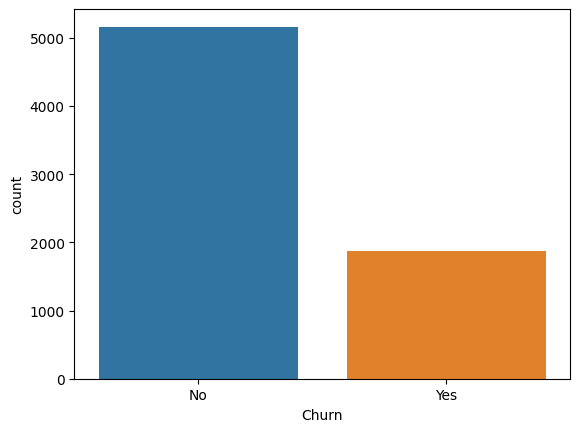

In [9]:
sns.countplot(x='Churn', data=df, hue='Churn');

In [10]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

## Заметно сразу, что классы несбалансированны. Но данная разница между классами не является громадной. 

## Теперь исследуем распределение колонки TotalCharges по различным категориям Churn с помощью графика Box Plot или Violin Plot

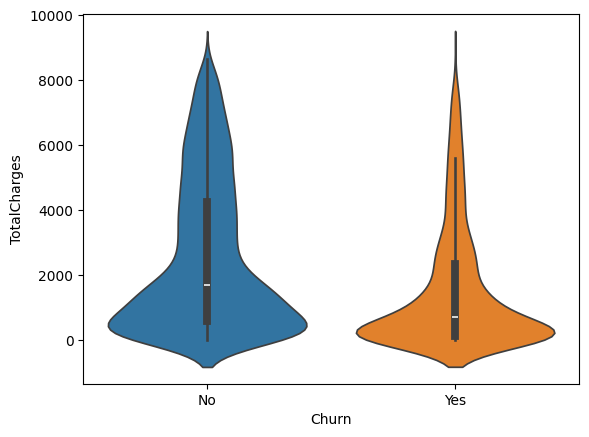

In [11]:
sns.violinplot(x='Churn', y='TotalCharges', data=df, hue='Churn');

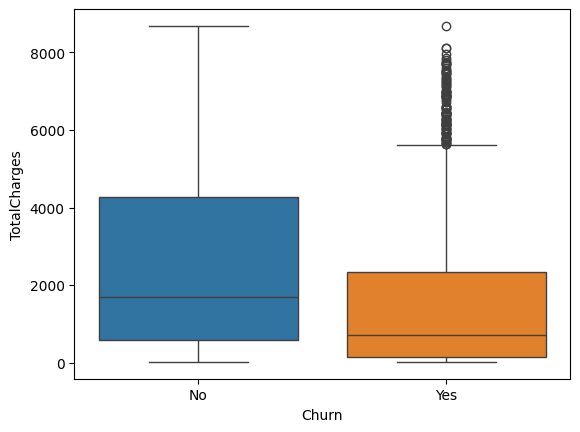

In [12]:
sns.boxplot(x='Churn', y='TotalCharges', data=df, hue='Churn');

## Здесь также видно, перекос данных и несбалансированность значений. Выбросов значительных не наблюдается

## Построим график boxplot с распределением колонки TotalCharges для различных типов контрактов

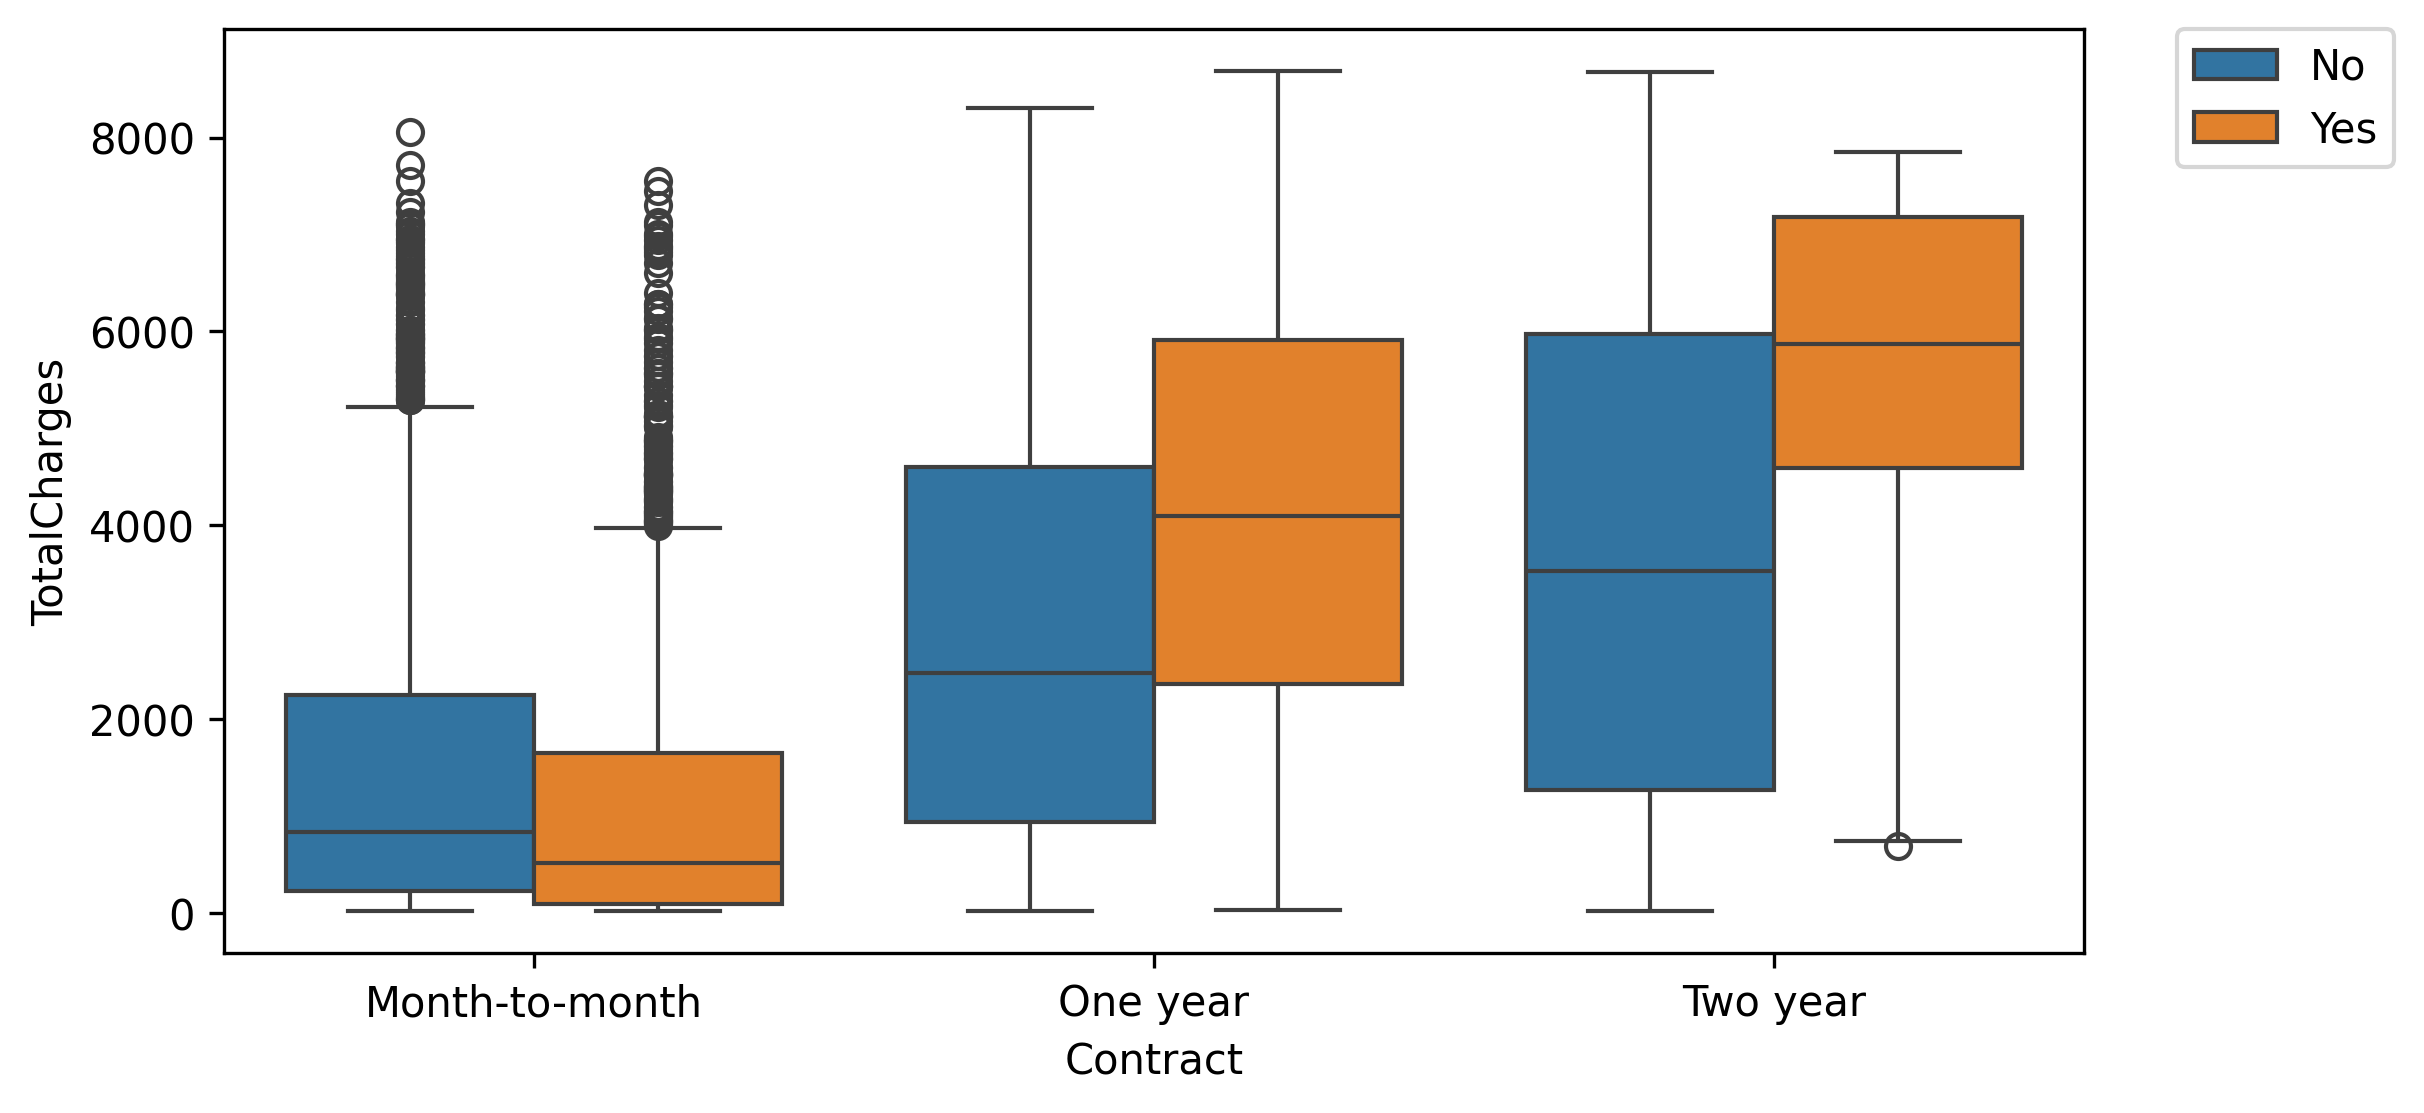

In [13]:
plt.figure(figsize=(8,4), dpi=300)
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

## Если мы посмотрим на тип контракта Month-to-month, то значение Churn в них примерно одинаковое. Почти такая же картина и для годовых контрактов, а вот для двухлетнего контракта видно, что меньше клиентов уходят в отток

## Теперь, подумаем, что могла бы сделать кампания Telco, чтобы меньше людей уходило в отток

## По вышеприведённым графикам видно, что чем больше значение TotalCharges(общие расходы) на любые виды контрактов, тем больше клиентов уходят в отток, и либо находят выгодные условия у конкурентов или, к примеру, не получают качественный сервис обслуживания в кампании Telco. Данный факт следует взять на вооружение

## Стоит задуматься над тем также, что почему при больших расходов большая часть клиентов не уходят в отток.

## Построим график bairplot с корреляцией числовыми признаками с целевой переменной(Churn). Для категориальных признаков проведём конвертацию их в дамми-переменные, так как корреляция вычисляется только для числовых колонок

In [14]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                             'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService', 
                             'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]).corr()

In [15]:
corr_df

SeniorCitizen  gender_Female  \
SeniorCitizen                                 1.000000       0.001819   
gender_Female                                 0.001819       1.000000   
gender_Male                                  -0.001819      -1.000000   
Partner_No                                   -0.016957      -0.001379   
Partner_Yes                                   0.016957       0.001379   
Dependents_No                                 0.210550       0.010349   
Dependents_Yes                               -0.210550      -0.010349   
PhoneService_No                              -0.008392      -0.007515   
PhoneService_Yes                              0.008392       0.007515   
MultipleLines_No                             -0.136377      -0.004335   
MultipleLines_No phone service               -0.008392      -0.007515   
MultipleLines_Yes                             0.142996       0.008883   
OnlineSecurity_No                             0.185145      -0.010859   
OnlineSecurity_No internet service           -0.182519      -0.004745   
OnlineSecurity_Yes                           -0.038576       0.016328   
OnlineBackup_No                               0.087539      -0.008605   
OnlineBackup_No internet service             -0.182519      -0.004745   
OnlineBackup_Yes                              0.066663       0.013093   
DeviceProtection_No                           0.094403       0.003163   
DeviceProtection_No internet service         -0.182519      -0.004745   
DeviceProtection_Yes                          0.059514       0.000807   
TechSupport_No                                0.205254      -0.003815   
TechSupport_No internet service              -0.182519      -0.004745   
TechSupport_Yes                              -0.060577       0.008507   
InternetService_DSL                          -0.108276      -0.007584   
InternetService_Fiber optic                   0.254923       0.011189   
InternetService_No                           -0.182519      -0.004745   
StreamingTV_No                                0.048664      -0.003088   
StreamingTV_No internet service              -0.182519      -0.004745   
StreamingTV_Yes                               0.105445       0.007124   
StreamingMovies_No                            0.034196      -0.006078   
StreamingMovies_No internet service          -0.182519      -0.004745   
StreamingMovies_Yes                           0.119842       0.010105   
Contract_Month-to-month                       0.137752       0.003251   
Contract_One year                            -0.046491      -0.007755   
Contract_Two year                            -0.116205       0.003603   
PaperlessBilling_No                          -0.156258      -0.011902   
PaperlessBilling_Yes                          0.156258       0.011902   
PaymentMethod_Bank transfer (automatic)      -0.016235       0.015973   
PaymentMethod_Credit card (automatic)        -0.024359      -0.001632   
PaymentMethod_Electronic check                0.171322      -0.000844   
PaymentMethod_Mailed check                   -0.152987      -0.013199   
Churn_No                                     -0.150541      -0.008545   
Churn_Yes                                     0.150541       0.008545   

                                         gender_Male  Partner_No  Partner_Yes  \
SeniorCitizen                              -0.001819   -0.016957     0.016957   
gender_Female                              -1.000000   -0.001379     0.001379   
gender_Male                                 1.000000    0.001379    -0.001379   
Partner_No                                  0.001379    1.000000    -1.000000   
Partner_Yes                                -0.001379   -1.000000     1.000000   
Dependents_No                              -0.010349    0.452269    -0.452269   
Dependents_Yes                              0.010349   -0.452269     0.452269   
PhoneService_No                             0.007515    0.018397    -0.018397   
PhoneService_Yes          

In [16]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

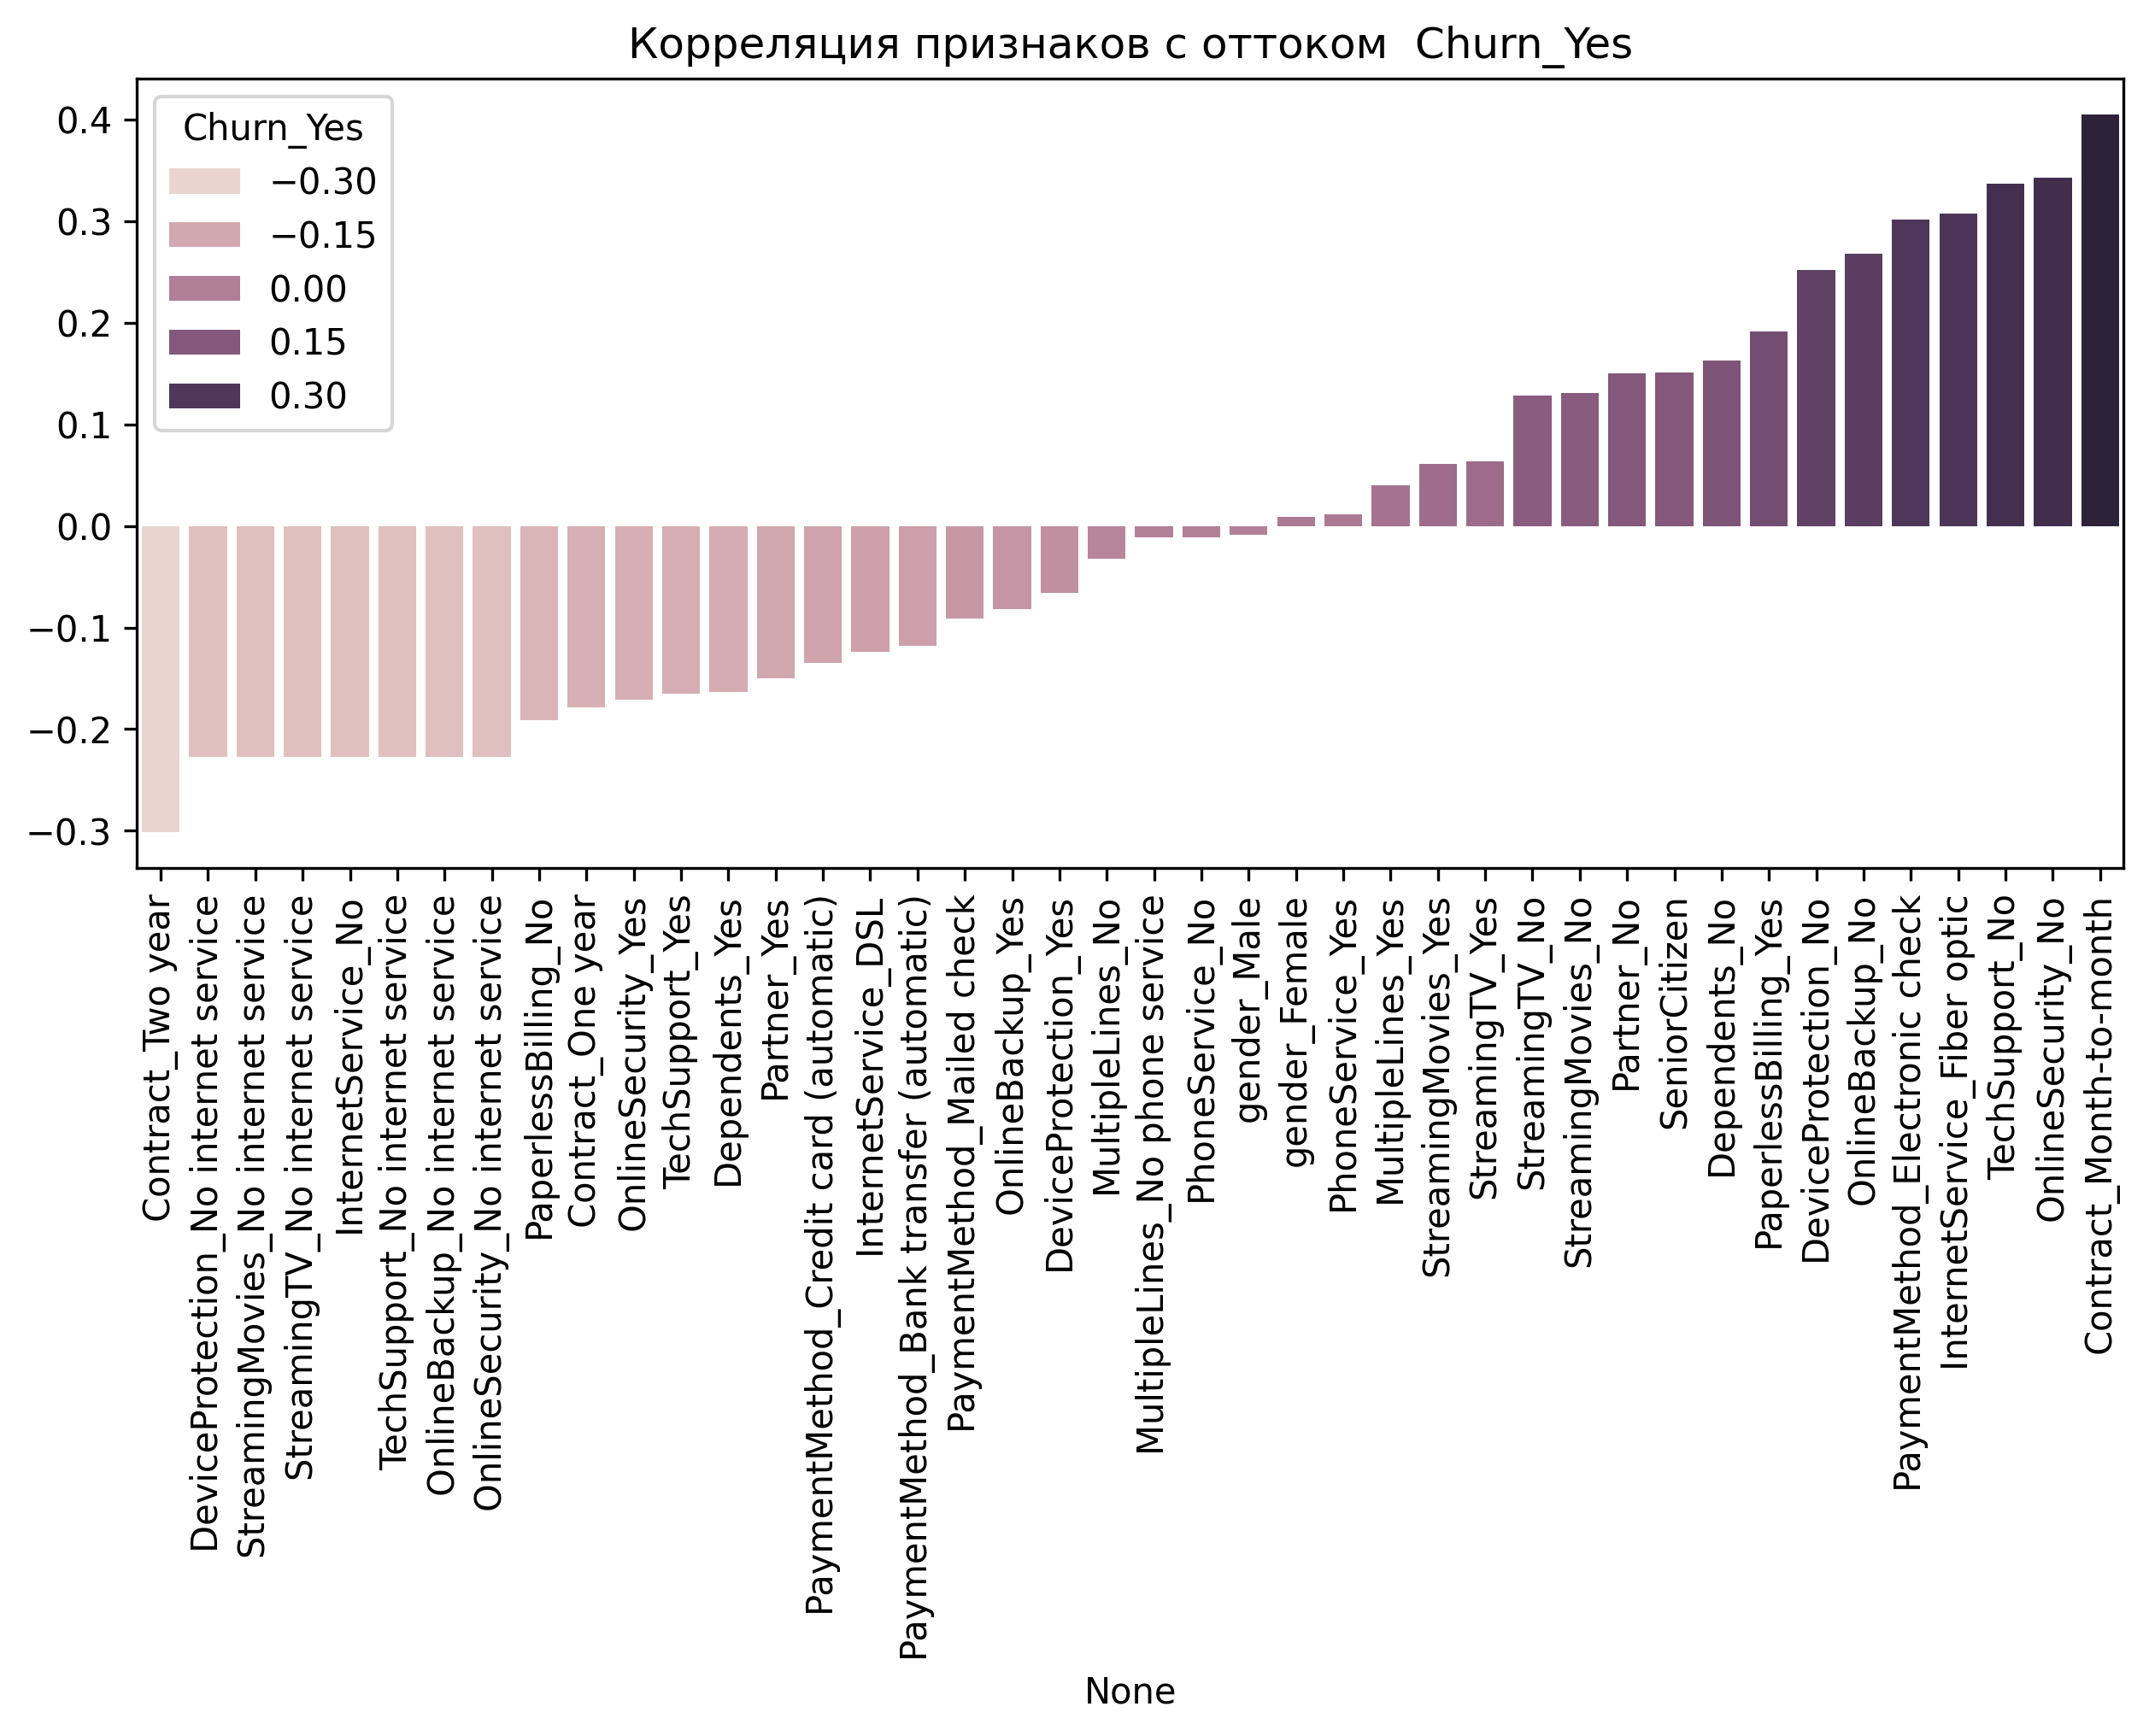

In [17]:
plt.figure(figsize=(10,4), dpi=300)
plt.title('Корреляция признаков с оттоком  Churn_Yes')
sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values, hue=corr_yes_churn)
plt.xticks(rotation=90);

## График корреляции показал, что для краткосрочных контрактов с большими расходами характерен высокий отток клиентов

## Проведём анализ оттока и когорт.

## Разобьём всех абонентов(клиентов) на отдельные сегменты по длительности обслуживания в кампании Telco. Это нам поможет понять, как меняется поведение клиентов в зависимости от срока обслуживания

## Посмотрим какие у нас есть виды контрактов

In [18]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [19]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

In [20]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

In [21]:
df['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

## Построим гистограмму с распределением значений колонки tenure - это количество месяцев, сколько времени человек является(или являлся) абонентом кампании.

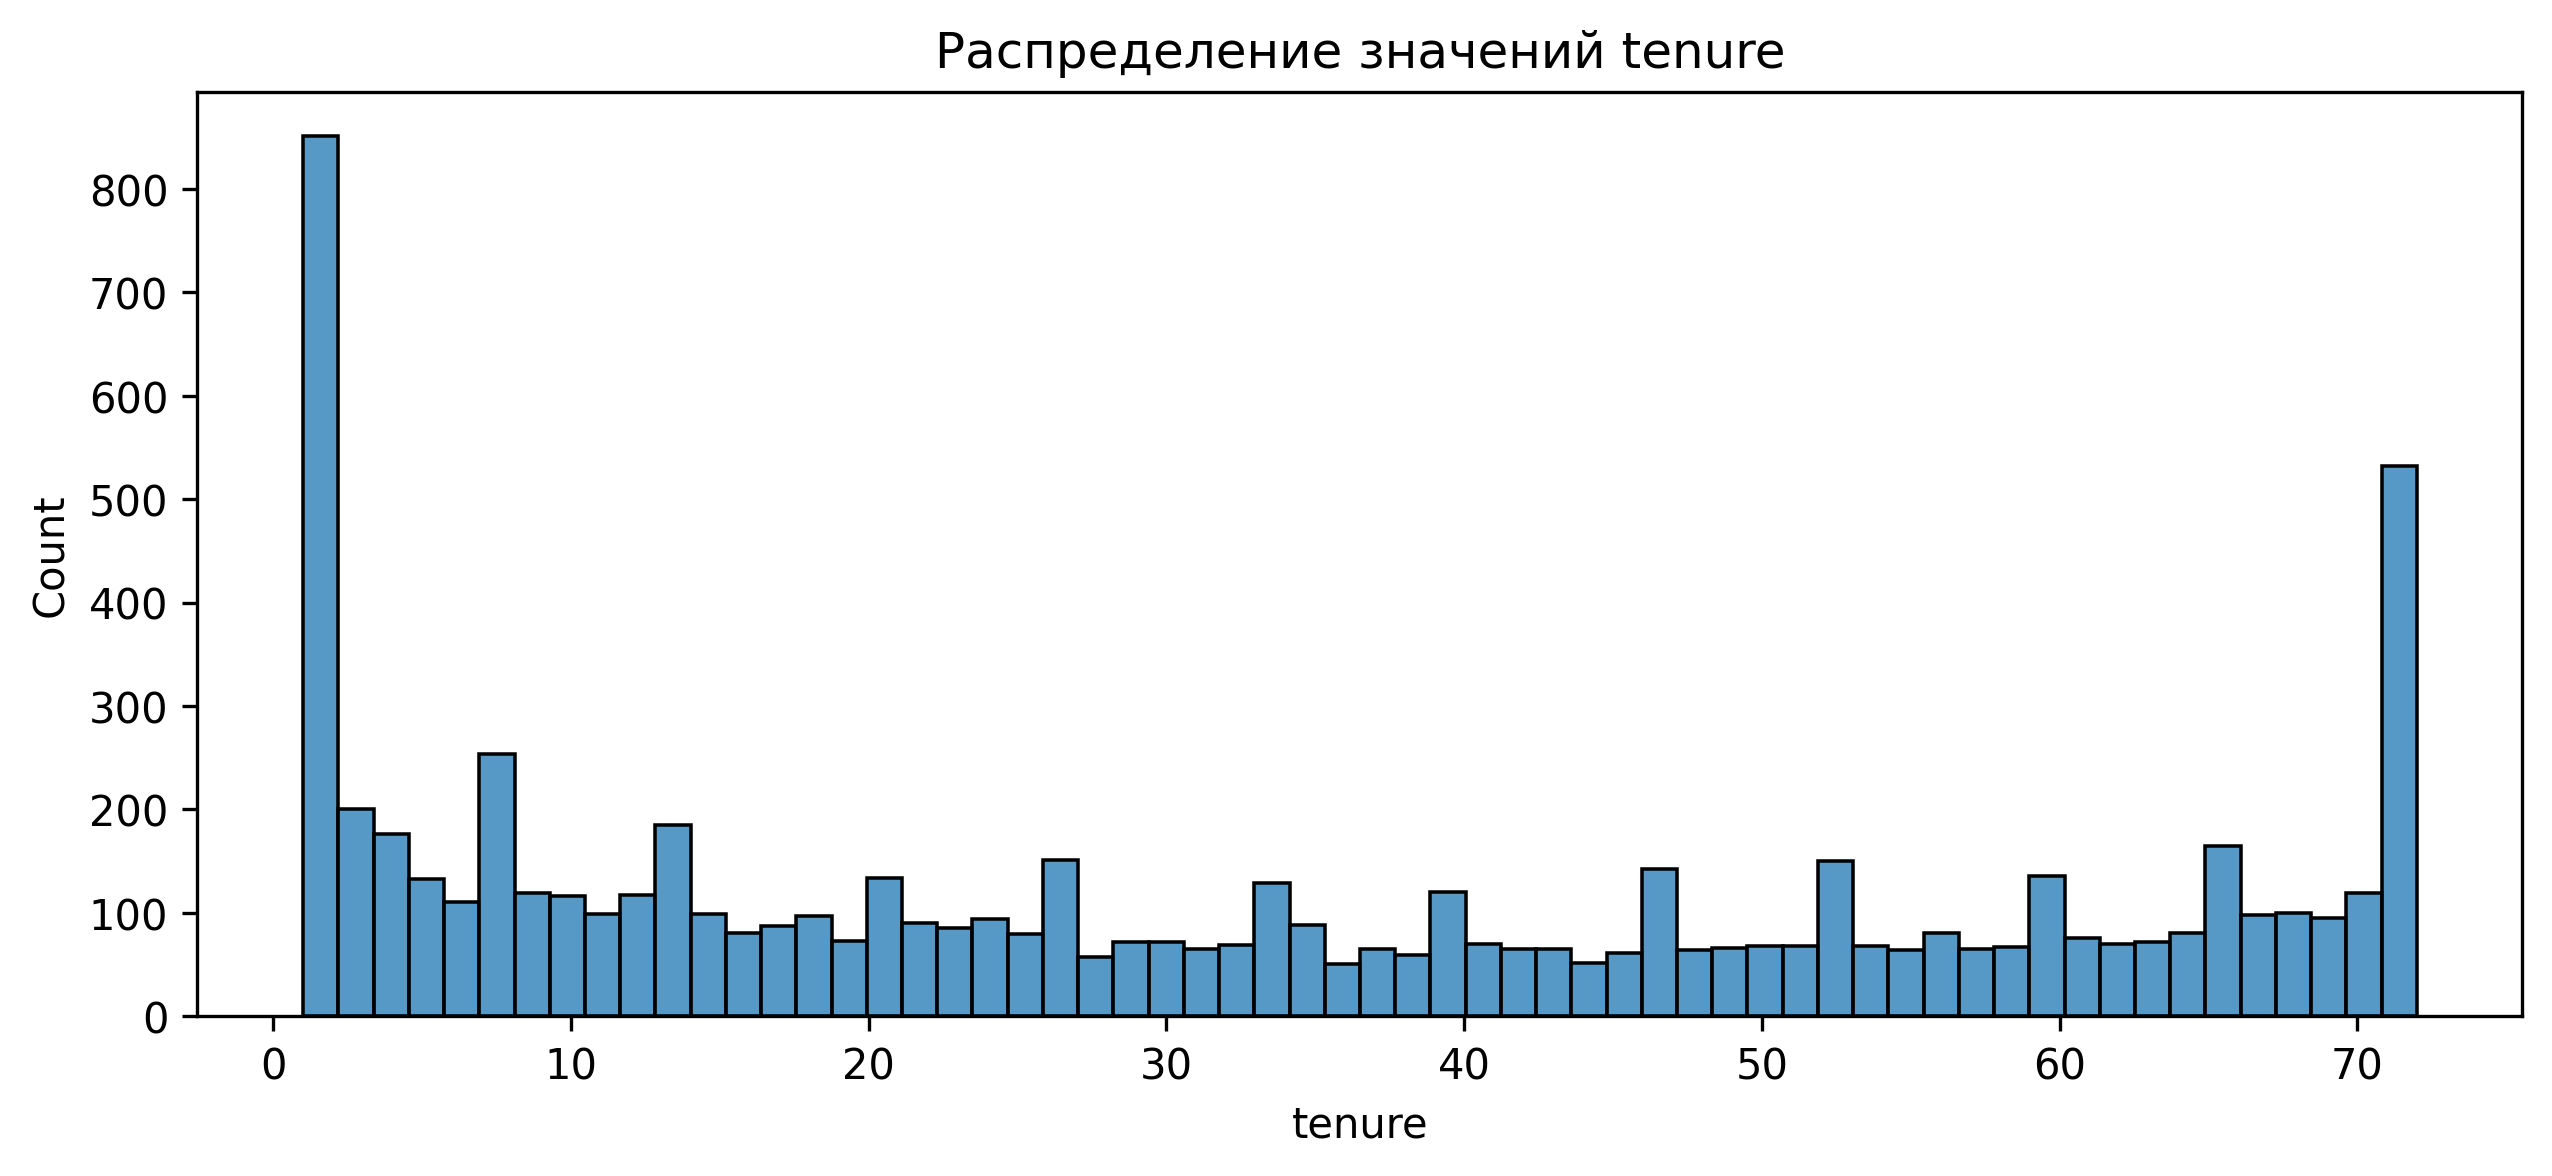

In [22]:
plt.figure(figsize=(10,4), dpi=300)
plt.title('Распределение значений tenure')
sns.histplot(data=df, x='tenure', bins=60);

## Видно, что очень много клиентов имеют значение 'tenure' от 1 до 2 месяцев. Второе пиковое значение находится в районе 72 и заметны на графике всплески, что скорее означает продление годовых или двухлетних контрактов

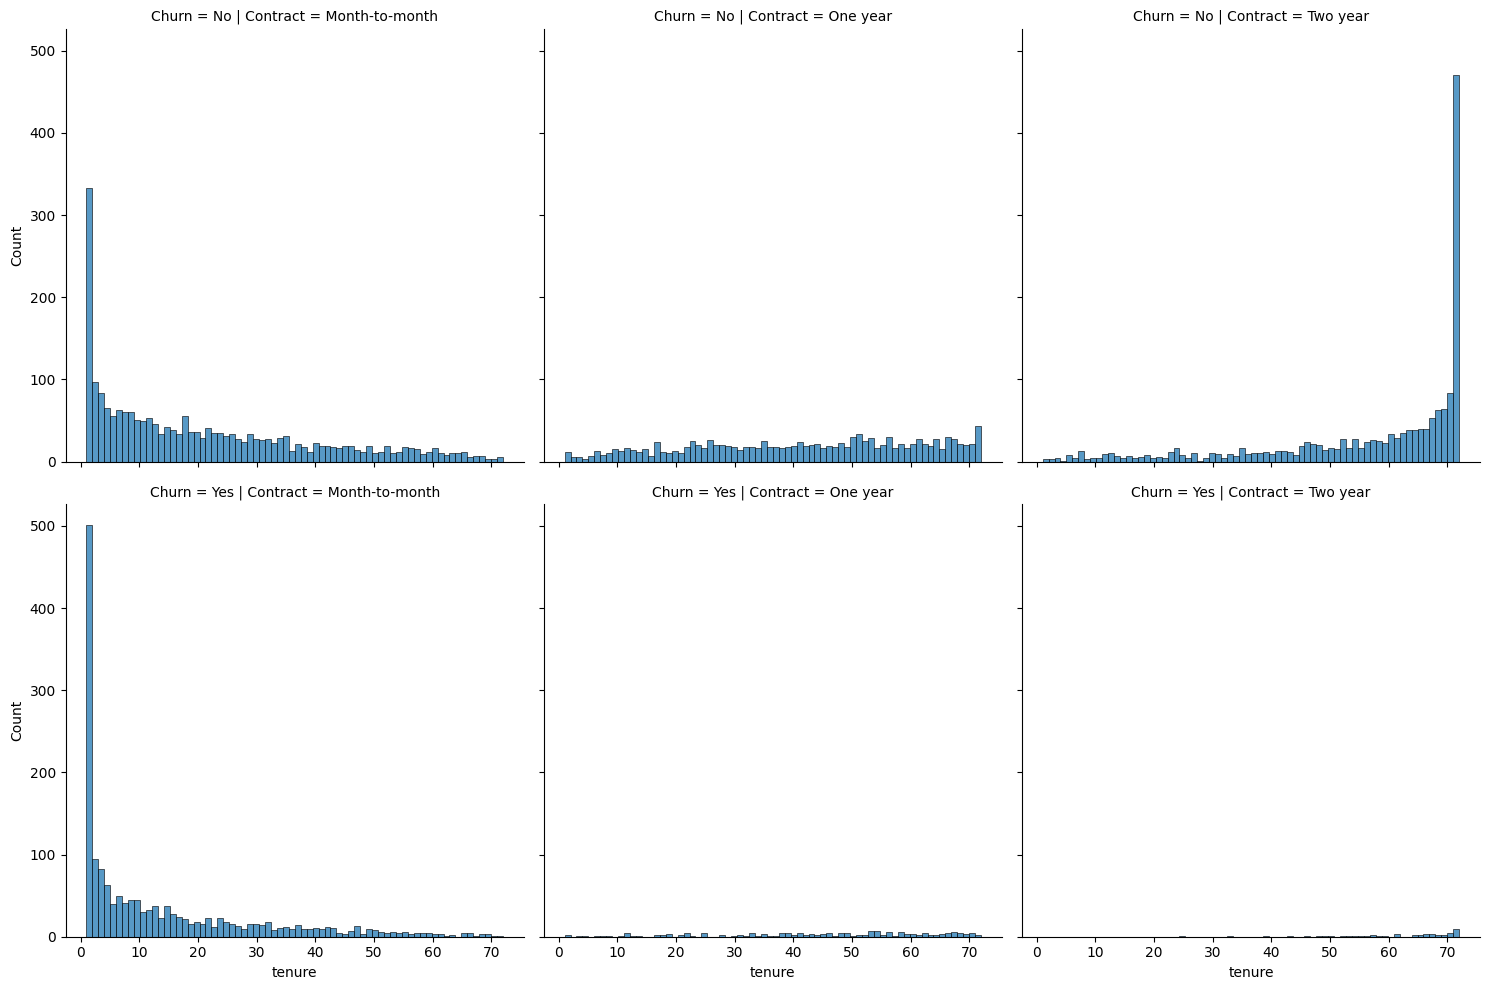

In [23]:
#plt.title('Распределение значений tenure')
sns.displot(data=df, x='tenure', bins=70, col='Contract', row='Churn')
plt.show();

## По графику displot видно, что на годовых и двугодовых контрактах, уходящих в отток клиентов мало, поэтому основные усилия можно направить на контракты 'Month-to-month'. Причём для краткосрочных контрактов(меньше года) пик значения, наблюдается от 1 до 2 месяцев для клиентов уходящих в отток. Но затем идёт пологое распределение. Следует учесть тот факт, что ранее мы наблюдали большой отток клиентов из-за больших расходов на долгосрочных контрактах. Возможно, отток на контрактах 'Month-to-month' обусловлен из за высоких цен(стоимость тарифа) чем на долгосрочных контрактах. В таком случае кампании Telco следовало бы проводить активную маркетинговую акцию, т.е. предлагать клиентам с контрактом 'Month-to-month' перейти на годовые или двугодовые контракты, тем самым доход от этих абонентов снизится, но в долгосрочной перспективе кампания получит больший суммарный доход от этого абонента. 

## Построим график scatterplot для колонок Total Charges и Monthly Charges, колонки раскрашим по колонке Churn

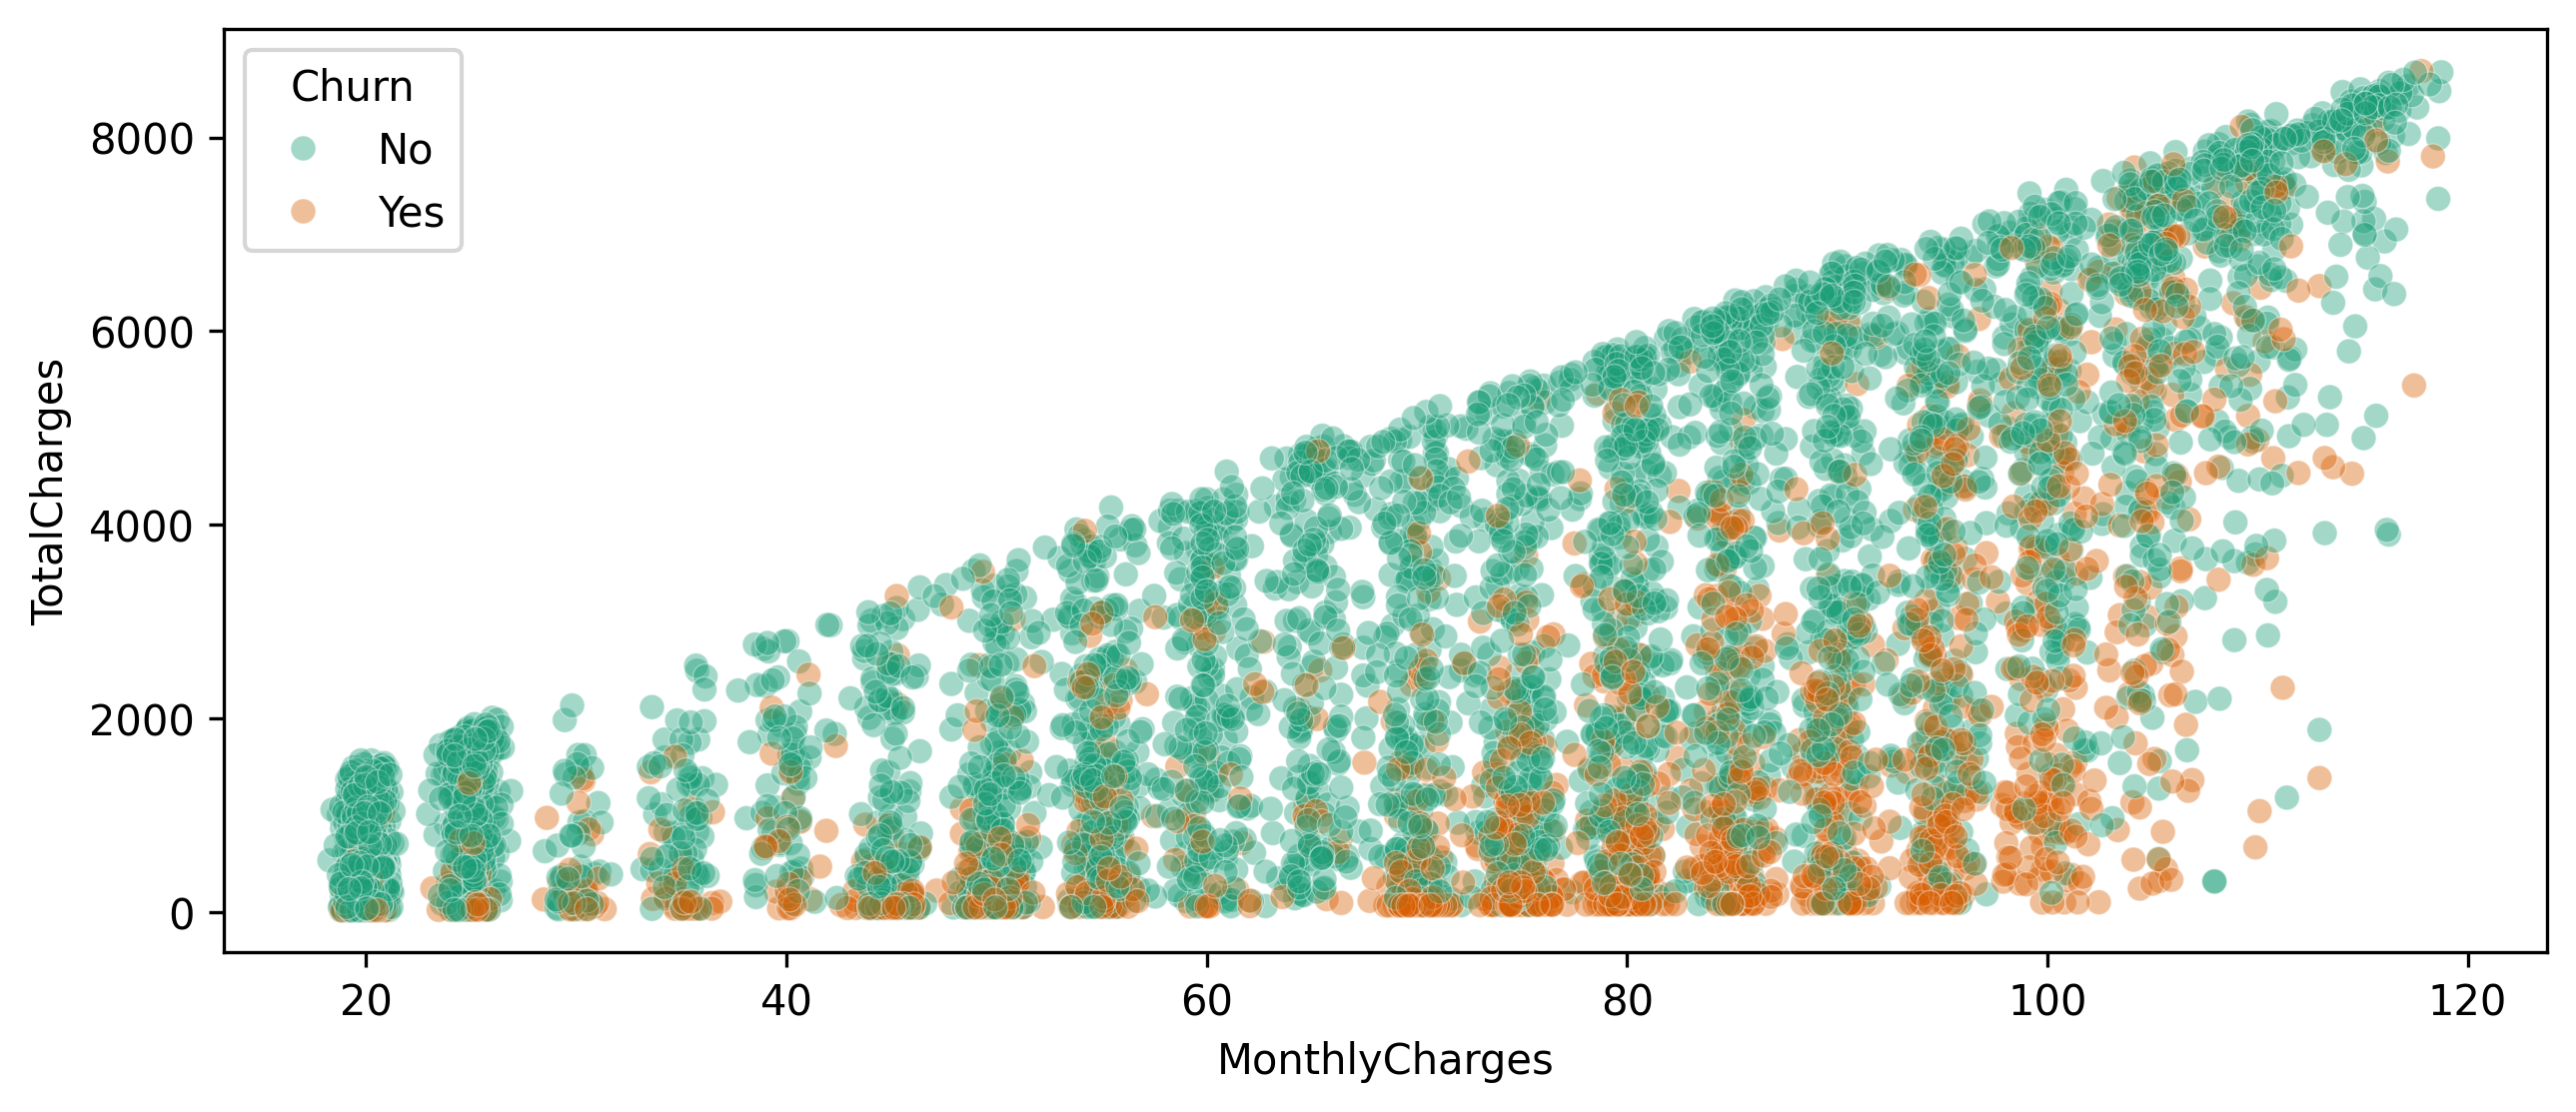

In [24]:
plt.figure(figsize=(10,4), dpi=300)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.4, linewidth=0.3, palette='Dark2');

## Очередной раз подтверждается тот факт, что в отток уходят те, у кого большие расходы. В принципе, это логично, чем больше ежемесячные расходы, тем больше у клиентов возникает причин искать более дешёвые тарифы у конкурентов

## Да, и вообще, это очень дискуссионный вопрос: "Что для кампании важнее; либо абонент с ежемесячными высокими платежами(MonthlyCharges), либо абонент с восыкими общими платежами(TotalCharges)". Эти два показателя связаны между собой через длительность по времени(tenure)

## На графике scatterplot мы подтверждаем, что в отток уходят клиенты с высокими ежемесячными расходами, причём в основном у них небольшие значения(TotalCharges).

## СОЗДАНИЕ КОГОРТ (СЕГМЕНТОВ) ПО КОЛОНКЕ Tenure

## Для начала поместим различные значения tenure (1 месяц, 2 месяц, 3 месяца и так далее) в отдельные когорты (сегменты).

## Для каждого уникального значения колонки tenure в качестве когорты, вычислим процент оттока (churn rate) - это количество тех людей, кто ушёл в отток в когорте, как процент от общего количества людей в данной когорте. Вычислим такой процент отдельно для каждой когорты. В итоге должно получиться когорты от 1 до 72 месяцев, и с увеличением количества месяцев уровень оттока должен снижаться. Это разумно, потому что чем дольше клиент пользуется услугами кампании, тем вероятнее то, что его/её всё устраивает, и он/она продолжит пользоваться этими услугами 

In [25]:
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']

In [26]:
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

In [27]:
churn_rate = 100 * yes_churn / (no_churn + yes_churn)
churn_rate

tenure                   1          2     3          4          5          6   \
customerID        61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
gender            61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
SeniorCitizen     61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
Partner           61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
Dependents        61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
PhoneService      61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
MultipleLines     61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
InternetService   61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
OnlineSecurity    61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
OnlineBackup      61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
DeviceProtection  61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
TechSupport       61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
StreamingTV       61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
StreamingMovies   61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
Contract          61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
PaperlessBilling  61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
PaymentMethod     61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
MonthlyCharges    61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
TotalCharges      61.990212  51.680672  47.0  47.159091  48.120301  36.363636   

tenure                   7          8          9          10  ...        63  \
customerID        38.931298  34.146341  38.655462  38.793103  ...  5.555556   
gender            38.931298  34.146341  38.655462  38.793103  ...  5.555556   
SeniorCitizen     38.931298  34.146341  38.655462  38.793103  ...  5.555556   
Partner           38.931298  34.146341  38.655462  38.793103  ...  5.555556   
Dependents        38.931298  34.146341  38.655462  38.793103  ...  5.555556   
PhoneService      38.931298  34.146341  38.655462  38.793103  ...  5.555556   
MultipleLines     38.931298  34.146341  38.655462  38.793103  ...  5.555556   
InternetService   38.931298  34.146341  38.655462  38.793103  ...  5.555556   
OnlineSecurity    38.931298  34.146341  38.655462  38.793103  ...  5.555556   
OnlineBackup      38.931298  34.146341  38.655462  38.793103  ...  5.555556   
DeviceProtection  38.931298  34.146341  38.655462  38.793103  ...  5.555556   
TechSupport       38.931298  34.146341  38.655462  38.793103  ...  5.555556   
StreamingTV       38.931298  34.146341  38.655462  38.793103  ...  5.555556   
StreamingMovies   38.931298  34.146341  38.655462  38.793103  ...  5.555556   
Contract          38.931298  34.146341  38.655462  38.793103  ...  5.555556   
PaperlessBilling  38.931298  34.146341  38.655462  38.793103  ...  5.555556   
PaymentMethod     38.931298  34.146341  38.655462  38.793103  ...  5.555556   
MonthlyCharges    38.931298  34.146341  38.655462  38.793103  ...  5.555556   
TotalCharges      38.931298  34.146341  38.655462  38.793103  ...  5.555556   

tenure             64         65         66         67   68        69  \
customerID        5.0  11.842105  14.606742  10.204082  9.0  8.421053   
gender            5.0  11.842105  14.606742  10.204082  9.0  8.421053   
SeniorCitizen     5.0  11.842105  14.606742  10.204082  9.0  8.421053   
Partner           5.0  11.842105  14.606742  10.204082  9.0  8.421053   
Dependents        5.0  11.842105  14.606742  10.204082  9.0  8.421053   
PhoneService      5.0  11.842105  14.606742  10.204082  9.0  8.421053   
MultipleLines     5.0  11.842105  14.606742  10.204082  9.0  8.421053   
InternetService   5.0  11.842105  14.606742  10.204082  9.0  8.421053   
OnlineSecurity    5.0  11.842105  14.606742  10.204082  9.0  8.421053   
OnlineBackup      5.0  11.842105  14.606742  10.204082  9.0  8.42105

In [28]:
churn_rate.transpose()

customerID     gender  SeniorCitizen    Partner  Dependents  \
tenure                                                                
1        61.990212  61.990212      61.990212  61.990212   61.990212   
2        51.680672  51.680672      51.680672  51.680672   51.680672   
3        47.000000  47.000000      47.000000  47.000000   47.000000   
4        47.159091  47.159091      47.159091  47.159091   47.159091   
5        48.120301  48.120301      48.120301  48.120301   48.120301   
...            ...        ...            ...        ...         ...   
68        9.000000   9.000000       9.000000   9.000000    9.000000   
69        8.421053   8.421053       8.421053   8.421053    8.421053   
70        9.243697   9.243697       9.243697   9.243697    9.243697   
71        3.529412   3.529412       3.529412   3.529412    3.529412   
72        1.657459   1.657459       1.657459   1.657459    1.657459   

        PhoneService  MultipleLines  InternetService  OnlineSecurity  \
tenure                                                                 
1          61.990212      61.990212        61.990212       61.990212   
2          51.680672      51.680672        51.680672       51.680672   
3          47.000000      47.000000        47.000000       47.000000   
4          47.159091      47.159091        47.159091       47.159091   
5          48.120301      48.120301        48.120301       48.120301   
...              ...            ...              ...             ...   
68          9.000000       9.000000         9.000000        9.000000   
69          8.421053       8.421053         8.421053        8.421053   
70          9.243697       9.243697         9.243697        9.243697   
71          3.529412       3.529412         3.529412        3.529412   
72          1.657459       1.657459         1.657459        1.657459   

        OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
tenure                                                             
1          61.990212         61.990212    61.990212    61.990212   
2          51.680672         51.680672    51.680672    51.680672   
3          47.000000         47.000000    47.000000    47.000000   
4          47.159091         47.159091    47.159091    47.159091   
5          48.120301         48.120301    48.120301    48.120301   
...              ...               ...          ...          ...   
68          9.000000          9.000000     9.000000     9.000000   
69          8.421053          8.421053     8.421053     8.421053   
70          9.243697          9.243697     9.243697     9.243697   
71          3.529412          3.529412     3.529412     3.529412   
72          1.657459          1.657459     1.657459     1.657459   

        StreamingMovies   Contract  PaperlessBilling  PaymentMethod  \
tenure                                                                
1             61.990212  61.990212         61.990212      61.990212   
2             51.680672  51.680672         51.680672      51.680672   
3             47.000000  47.000000         47.000000      47.000000   
4             47.159091  47.159091         47.159091      47.159091   
5             48.120301  48.120301         48.120301      48.120301   
...                 ...        ...               ...            ...   
68             9.000000   9.000000          9.000000       9.000000   
69             8.421053   8.421053          8.421053       8.421053   
70             9.243697   9.243697          9.243697       9.243697   
71             3.529412   3.529412          3.529412       3.529412   
72             1.657459   1.657459          1.657459       1.657459   

        MonthlyCharges  TotalCharges  
tenure                                
1            61.990212     61.990212  
2            51.680672     51.680672  
3            47.000000     47.000000  
4            47.159091     47.159091  
5            48.120301     48.120301  
...                ...           ...  
68            9.000000    

In [29]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

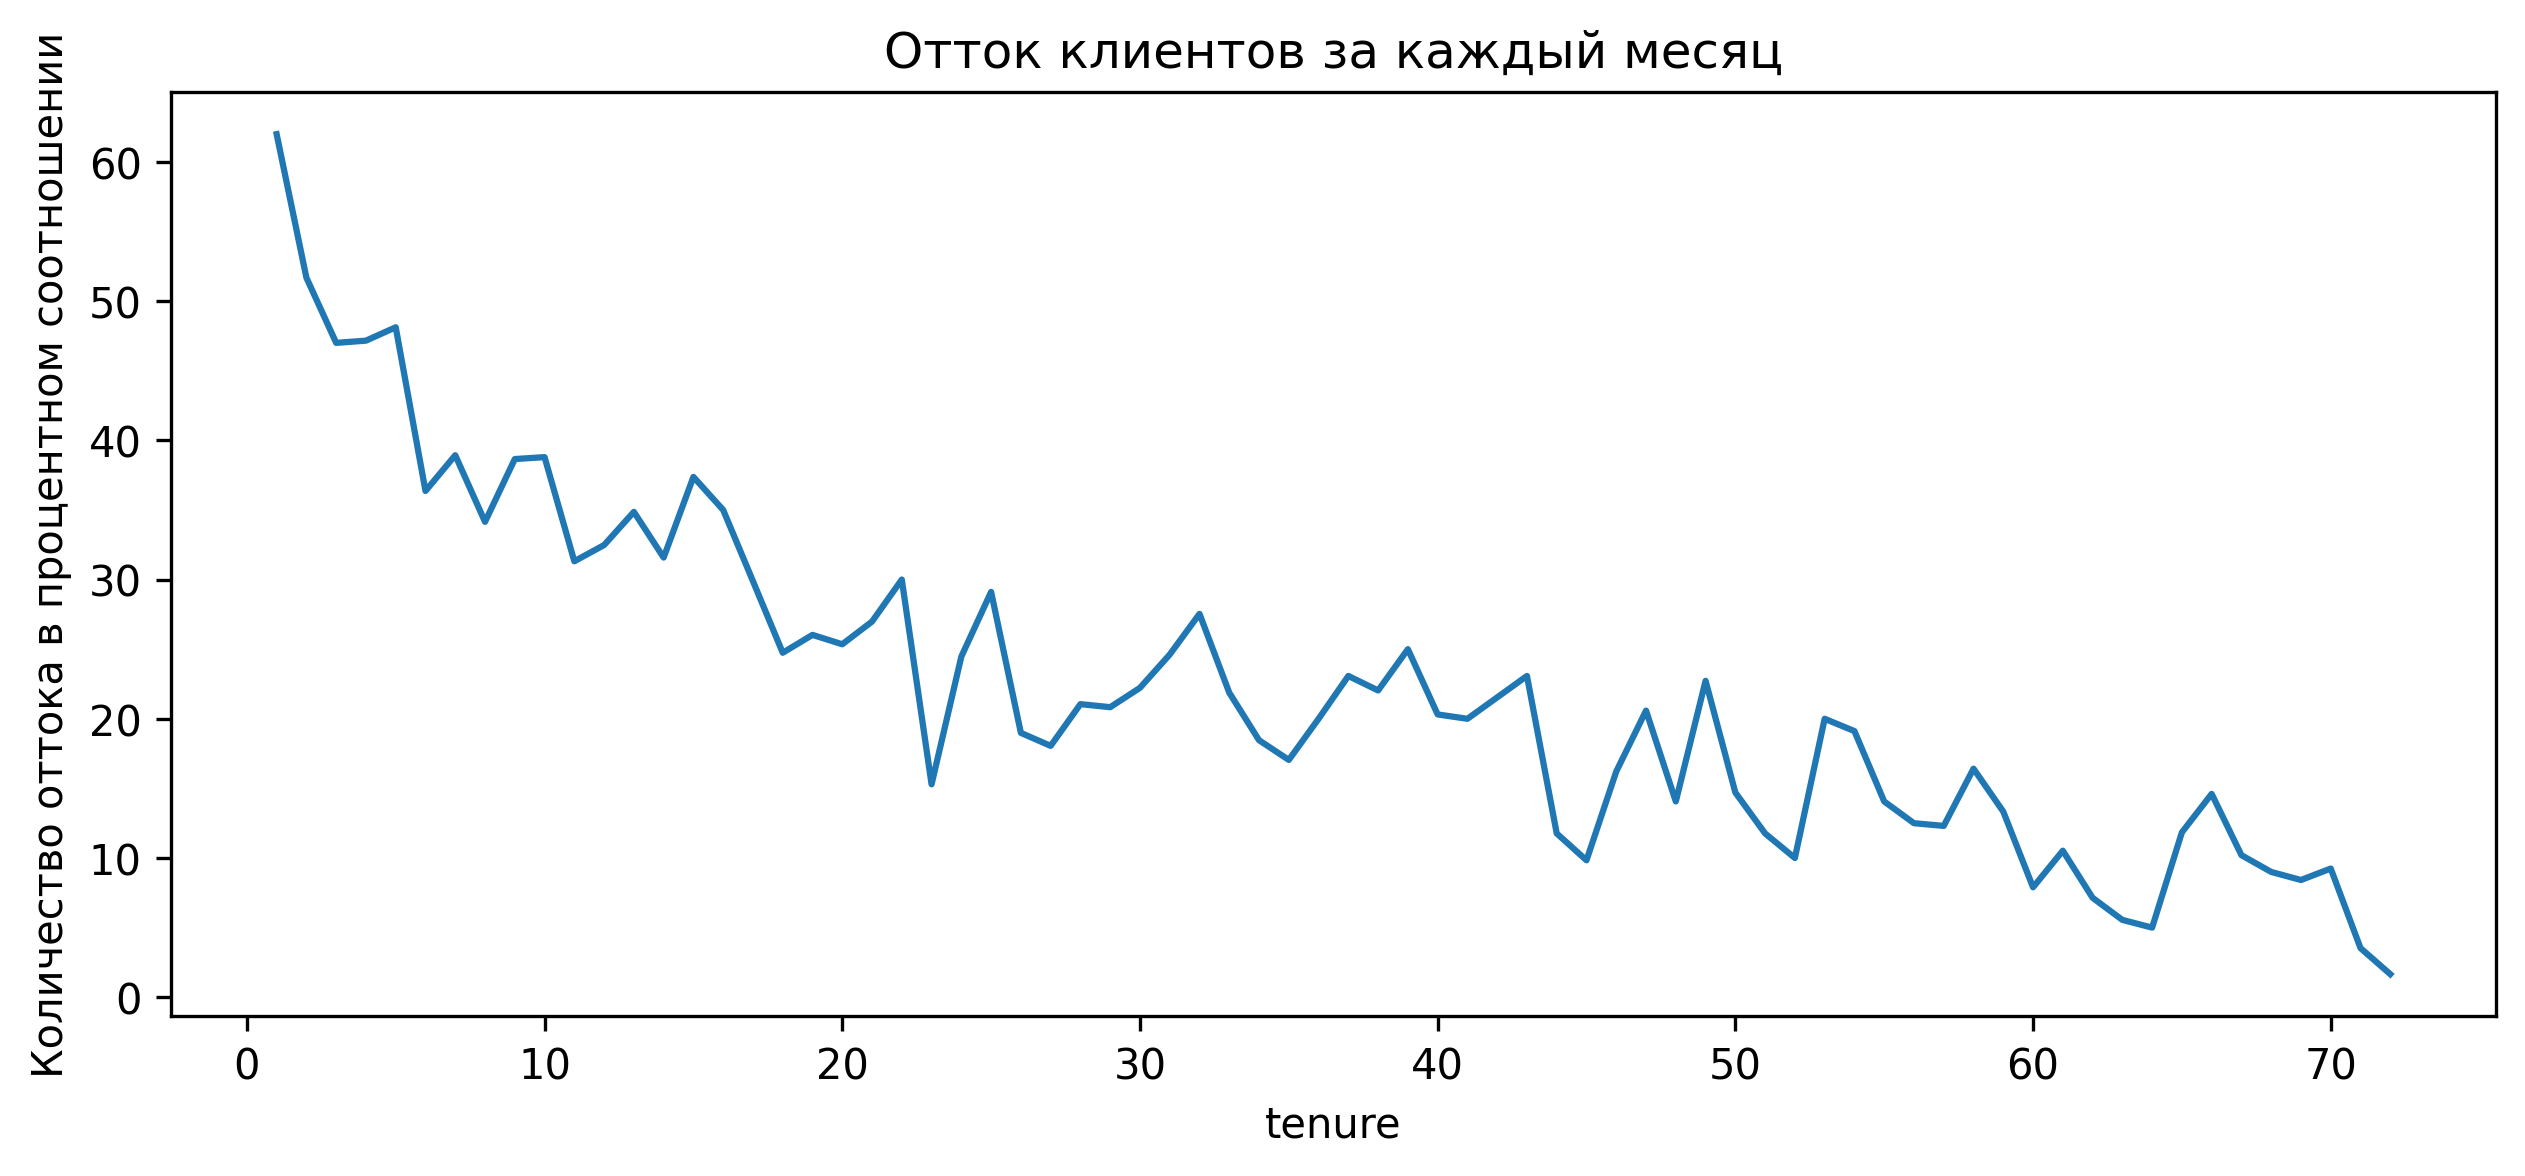

In [30]:
plt.figure(figsize=(10,4), dpi=300)
plt.title('Отток клиентов за каждый месяц')
plt.xlabel('Количество месяцев')
plt.ylabel('Количество оттока в процентном соотношении')
churn_rate.transpose()['customerID'].plot();

## Видно, что на графике пологое распределение. Чем больше значение tenure, тем меньше процент оттока в когорте

## Оптимизируем процесс исследования. На основе колонки tenure создадим колонку с названием 'Tenure Cohort', в которой будут следующие 4 категории:
- 0-12 месяцев
- 12-24 месяца
- 24-48 месяцев
- Более 48 месяцев

## Создадим функцию для преобразования данных

In [31]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 месяцев'
    elif tenure < 25:
        return '12-24 месяцев'
    elif tenure < 49:
        return '24-48 месяцев'
    else:
        return 'Более 48 месяцев'

In [32]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [33]:
df[['Tenure Cohort', 'tenure']]

Tenure Cohort  tenure
0         0-12 месяцев       1
1        24-48 месяцев      34
2         0-12 месяцев       2
3        24-48 месяцев      45
4         0-12 месяцев       2
...                ...     ...
7027     12-24 месяцев      24
7028  Более 48 месяцев      72
7029      0-12 месяцев      11
7030      0-12 месяцев       4
7031  Более 48 месяцев      66

[7032 rows x 2 columns]

## Построим график scatterplot для Total Charges и Monthly Charges, раскрашивая график разными цветами по колонке 'Tenure Cohort', которую создали ранее

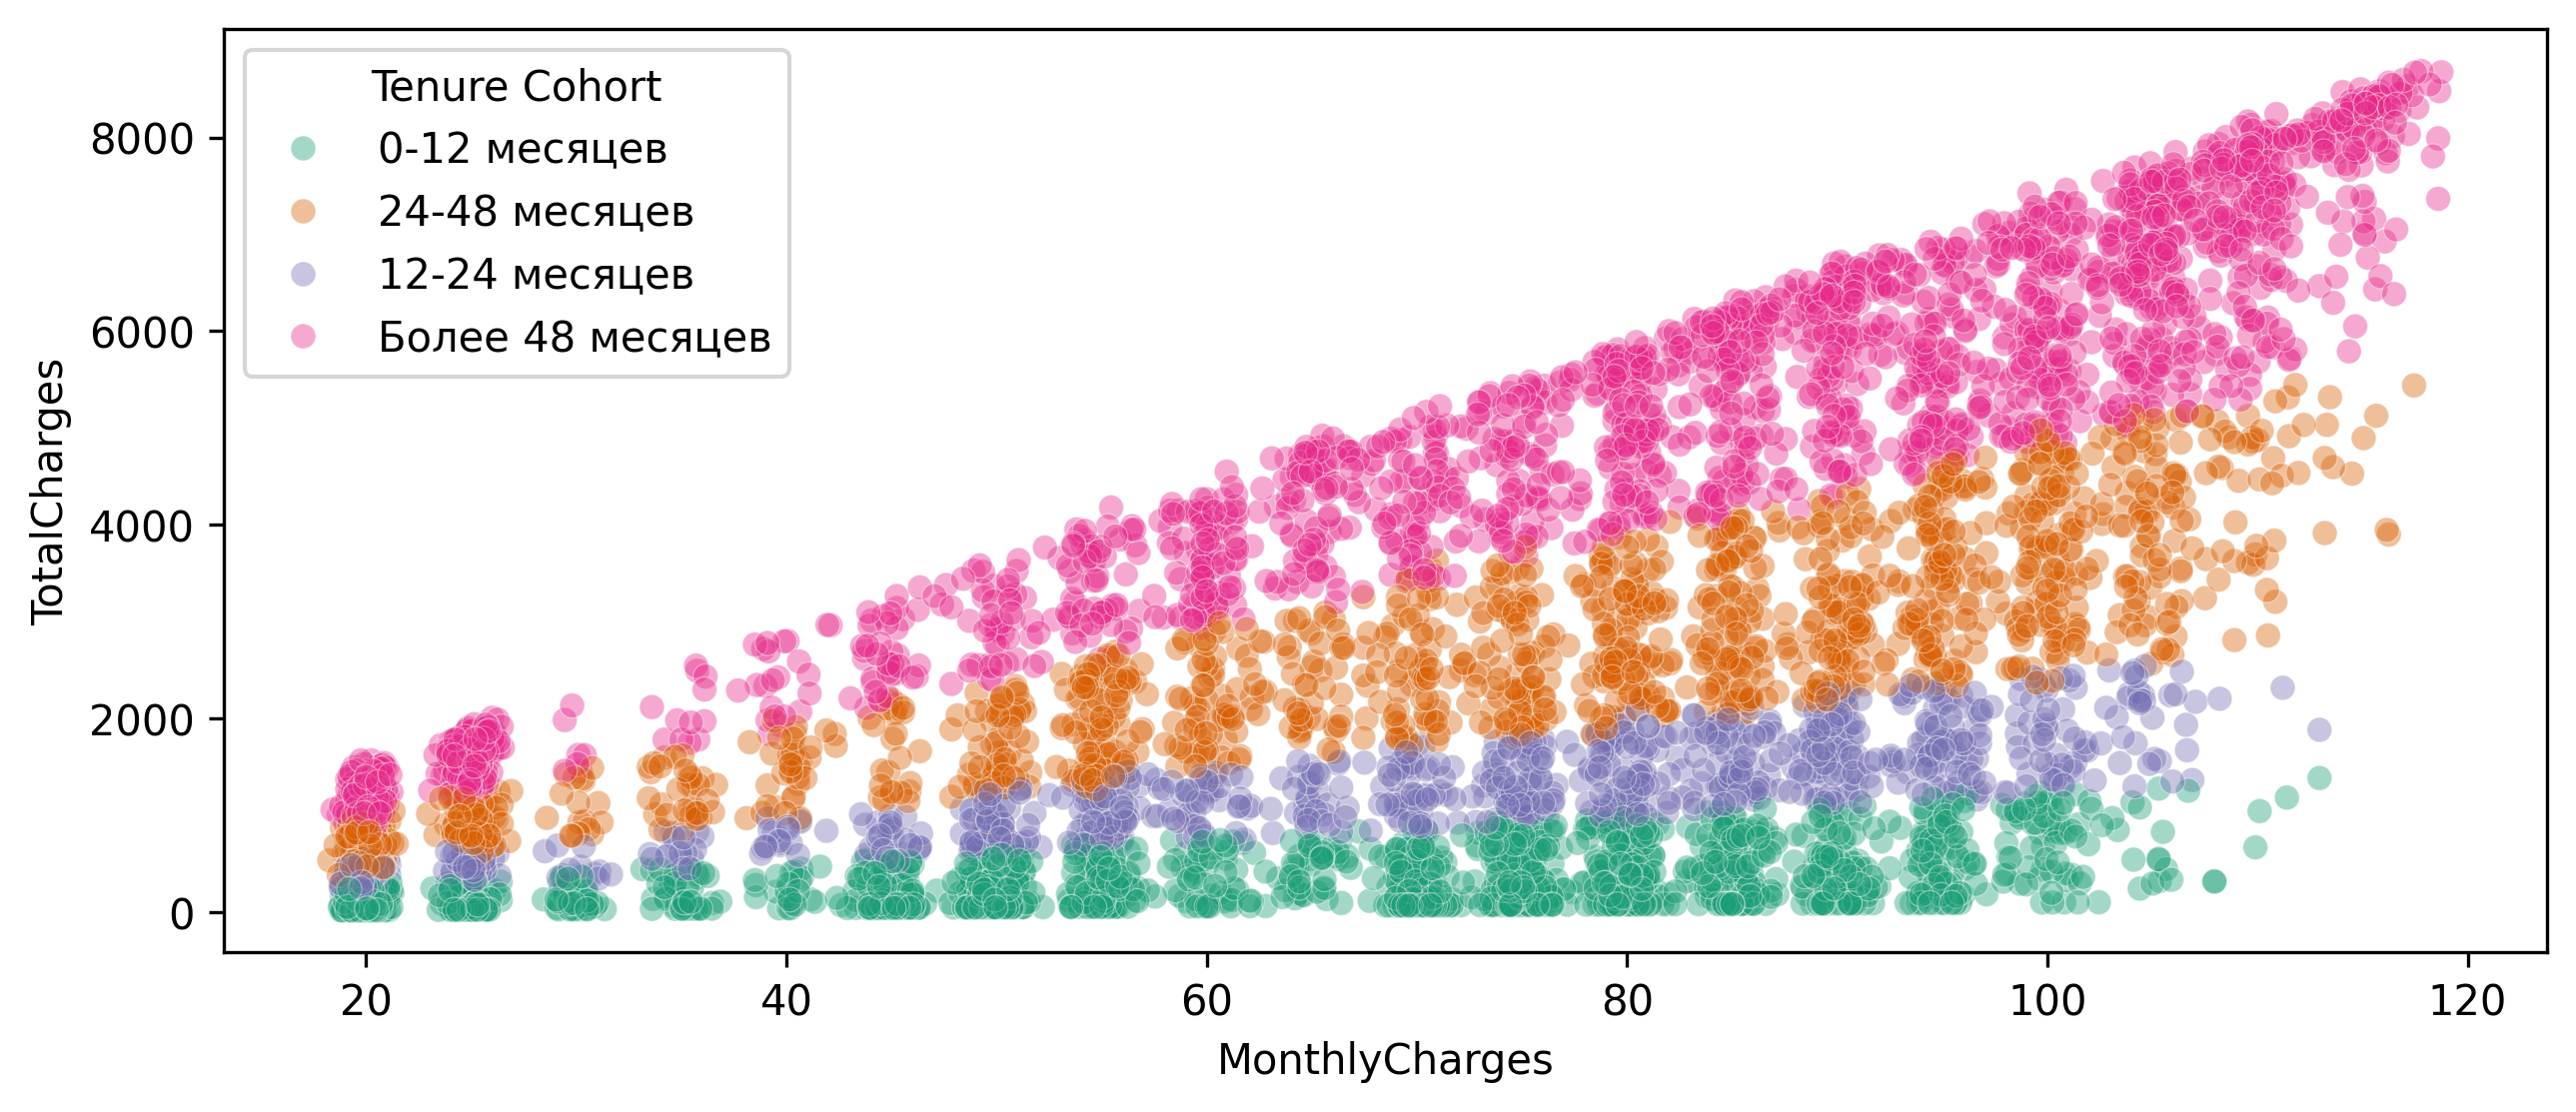

In [34]:
plt.figure(figsize=(10,4), dpi=300)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', alpha=0.4, linewidth=0.3, palette='Dark2');

## На рисунке всё выглядит логично. Чем больше когорта, тем большее значение 'TotalCharges' она принимает. Сам рисунок является более читаемым и легко воспринимаемым для анализа 

## Построим график countplot с количеством ушедших и не ушедших в отток людей в каждой когорте

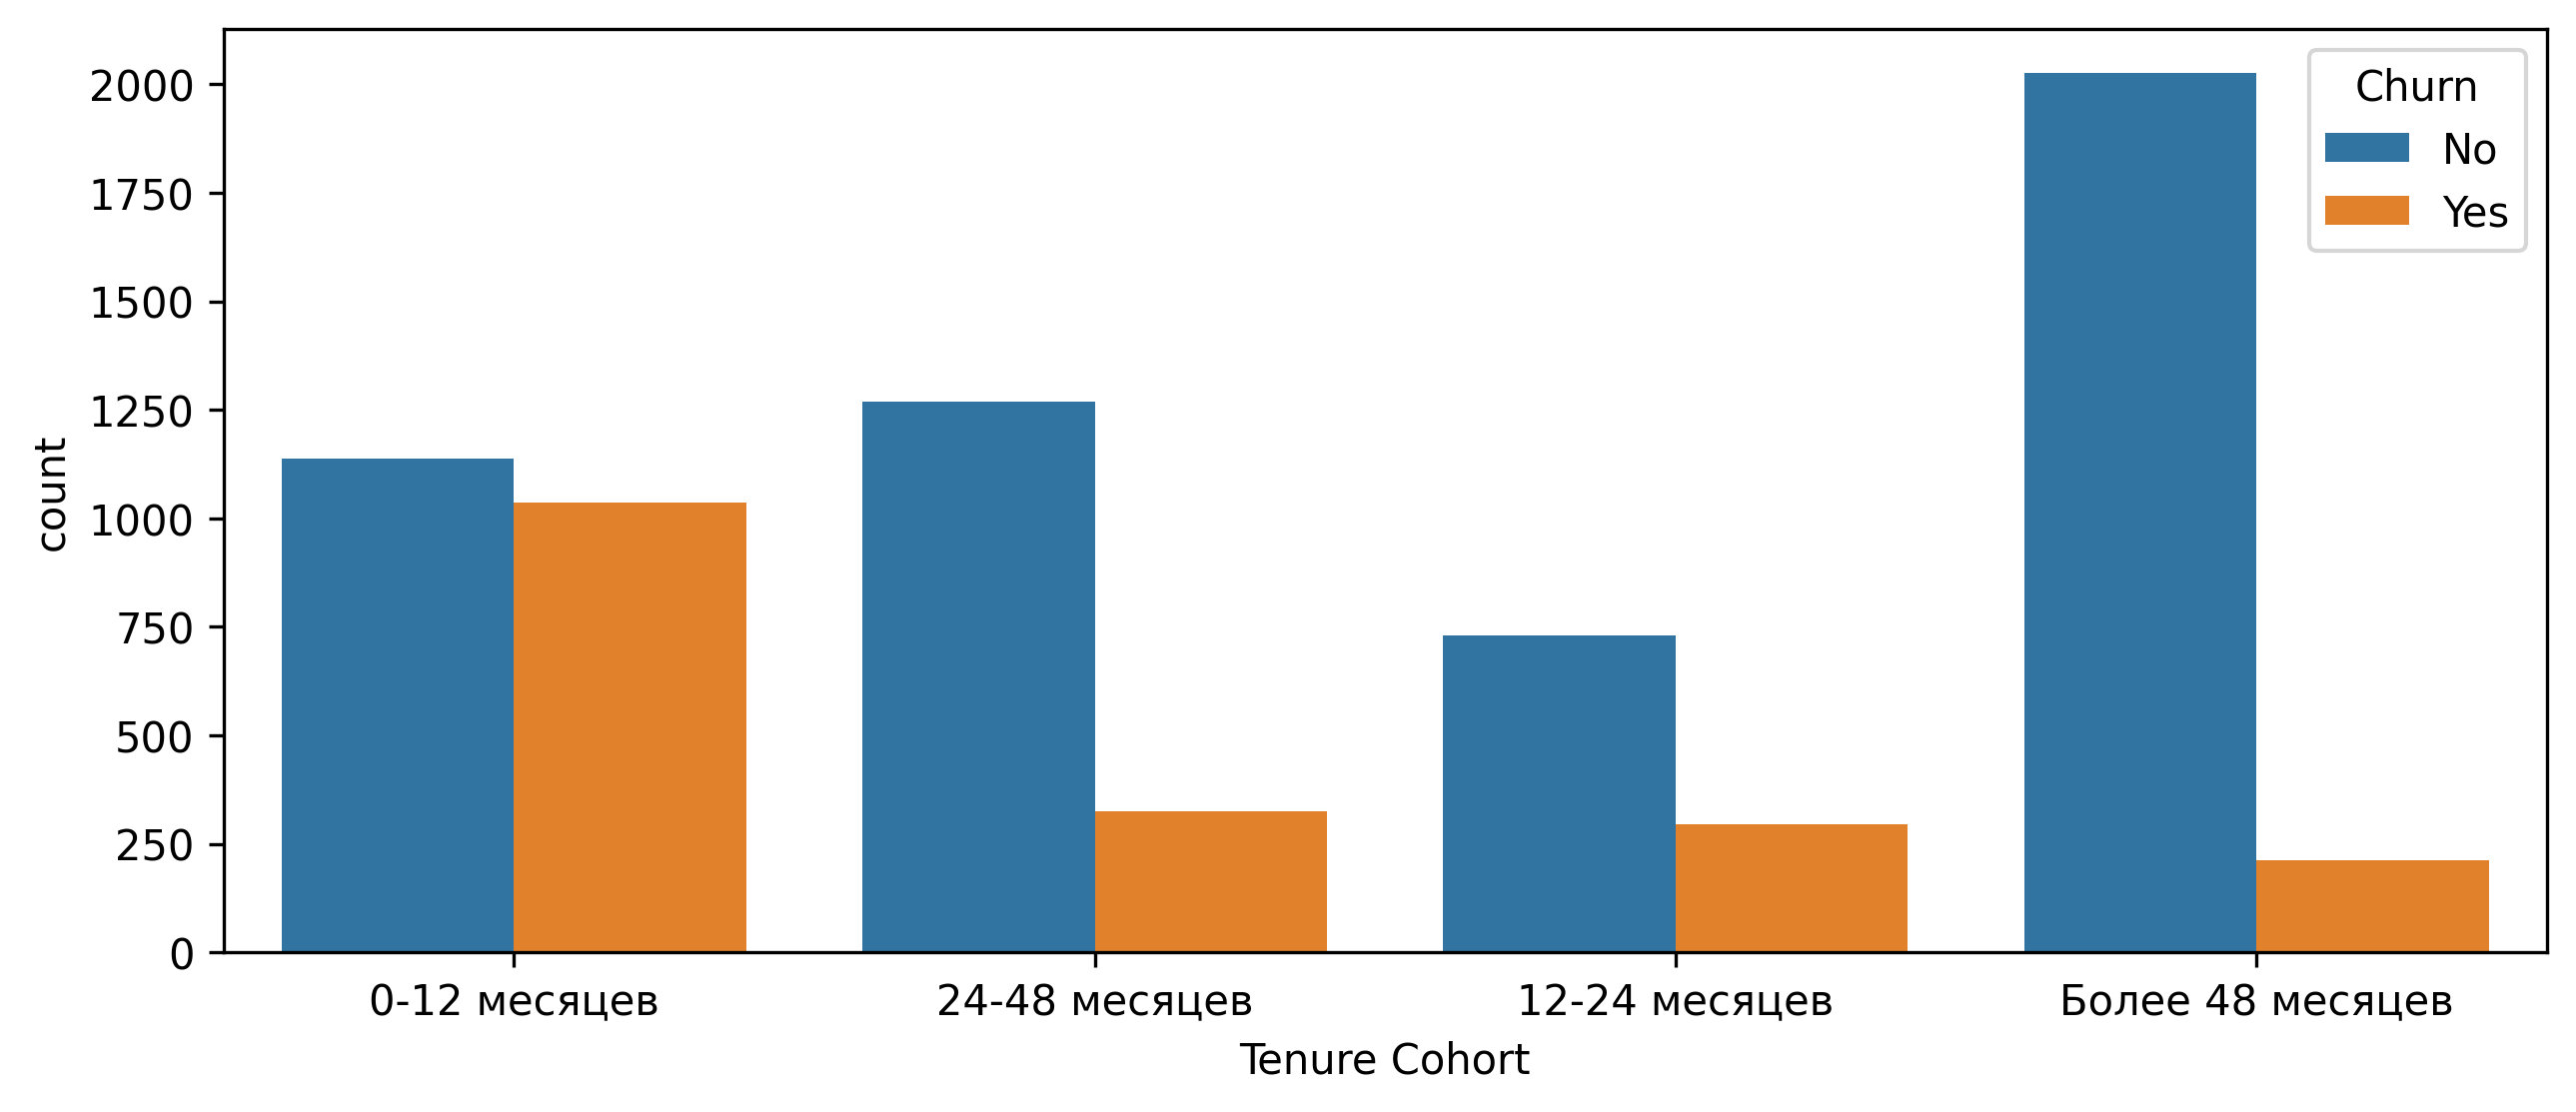

In [35]:
plt.figure(figsize=(10,4), dpi=300)
sns.countplot(data=df, x='Tenure Cohort', hue='Churn');

## Отчётливо видно, что клиенты с длительностью обслуживания более 48 месяцев менее подвержены к оттоку, а те кто пользуются услугами кампании менее 12 месяцев, то вероятность оттока заметно возрастает

## Создадим набор графиков CountPlot с количеством клиентов по различным когортам Tenure Cohort. Для каждого типа контракта создадим отдельный график, и раскрасим эти графики разными цветами по колонке Churn.

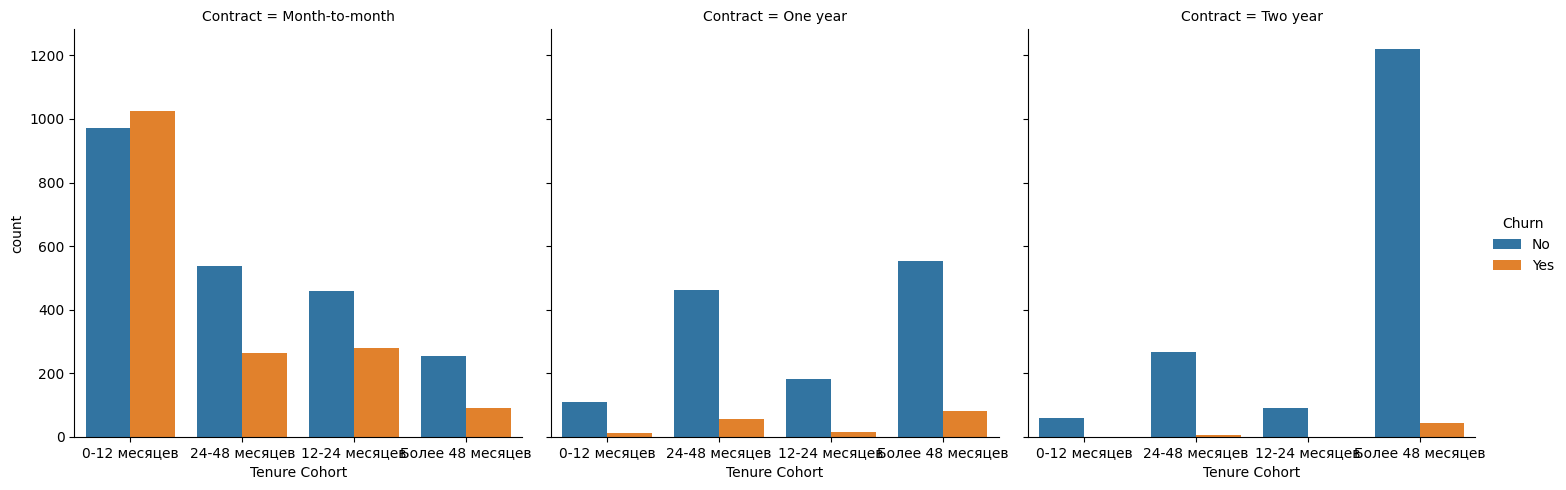

In [36]:
sns.catplot(data=df, x='Tenure Cohort', hue='Churn', kind='count', col='Contract');

## Вышеприведённый график, как и другие, также подтверждает тот факт, что клиенты на однолетнем и двухлетнем контрактах меньше уходят в отток вне зависимости от длительности пользования услугами

## ПЕРЕЙДЁМ К СОЗДАНИЮ ПРЕДИКТИВНОЙ МОДЕЛИ

## В нашем исследовании будем использовать модели машиного обучения с учителем. Исследуем 4 модели на основе деревьев: одно дерево решений, случайный лес, адаптивный бустинг и градиентный бустинг и сравним результаты.

## ОДНО ДЕРЕВО РЕШЕНИЙ(Decision Tree)

## Разделим все данные на признаки Х и целевую переменную У. Создадим дамми-переменные, где это необходимо, а также посмотрим, есть ли какие-то признаки, которые можно было бы удалить.

In [37]:
X = df.drop(['Churn', 'customerID'], axis=1)

In [38]:
X = pd.get_dummies(X, drop_first=True)

In [39]:
y = df['Churn']

## Выполним разбиение данных на обучающий и тестовый наборы(train test split), откладывая в сторону 10% данных для тестирования. В решениях мы используем random_state=101.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## Построим модель Decision Tree, оценим её работу и выполним её обучение

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt = DecisionTreeClassifier(max_depth=6)

In [44]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

## Оценим метрики работы модели дерева решений, выведим отчёт "classification report" и нарисуем график с матрицей ошибок (confusion matrix)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
preds = dt.predict(X_test)

In [47]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



## По данным видно, что модель лучше работает для класса "Churn['No']" чем "Churn['Yes']". Это логично и разумно, так как в классе "Churn['No']" содержится больше данных.

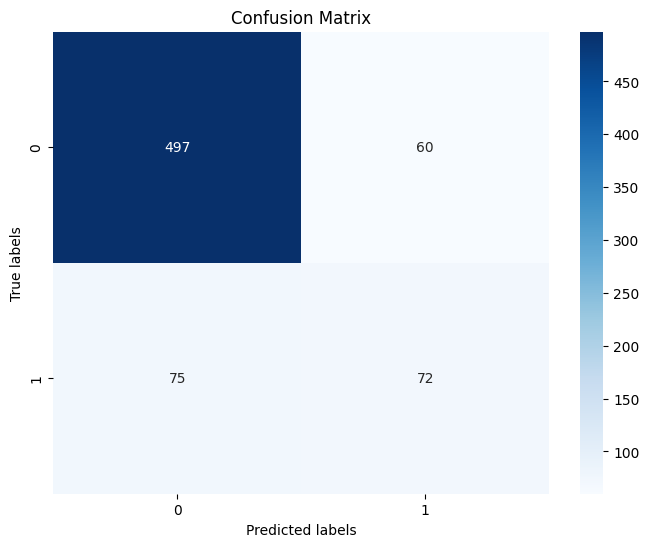

In [49]:
conf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

## Мы видим, что неправильно классифицированы 75 абонентов, когда наша модель предсказала, что оттока не будет, но отток случился и именно это число мы хотели бы минимизировать, так как здесь мы упускаем тех, кто уходит в отток. Кроме этого, есть ещё 60 людей, для которых модель предсказала, что они уйдут в отток, но на самом деле они не ушли в отток.

In [50]:
imp_feats = pd.DataFrame(data=dt.feature_importances_, index=X.columns, columns=['Важность'])

In [51]:
imp_feats = imp_feats.sort_values('Важность')

In [52]:
imp_feats = imp_feats[imp_feats['Важность'] > 0]
imp_feats

Важность
PhoneService_Yes                  0.000890
gender_Male                       0.001237
OnlineBackup_Yes                  0.005341
MultipleLines_No phone service    0.006962
TechSupport_Yes                   0.007868
OnlineSecurity_Yes                0.008376
Contract_One year                 0.010021
SeniorCitizen                     0.010825
MultipleLines_Yes                 0.012432
OnlineBackup_No internet service  0.026290
Contract_Two year                 0.027065
PaymentMethod_Electronic check    0.034436
MonthlyCharges                    0.046115
TotalCharges                      0.064168
InternetService_Fiber optic       0.314060
tenure                            0.423914

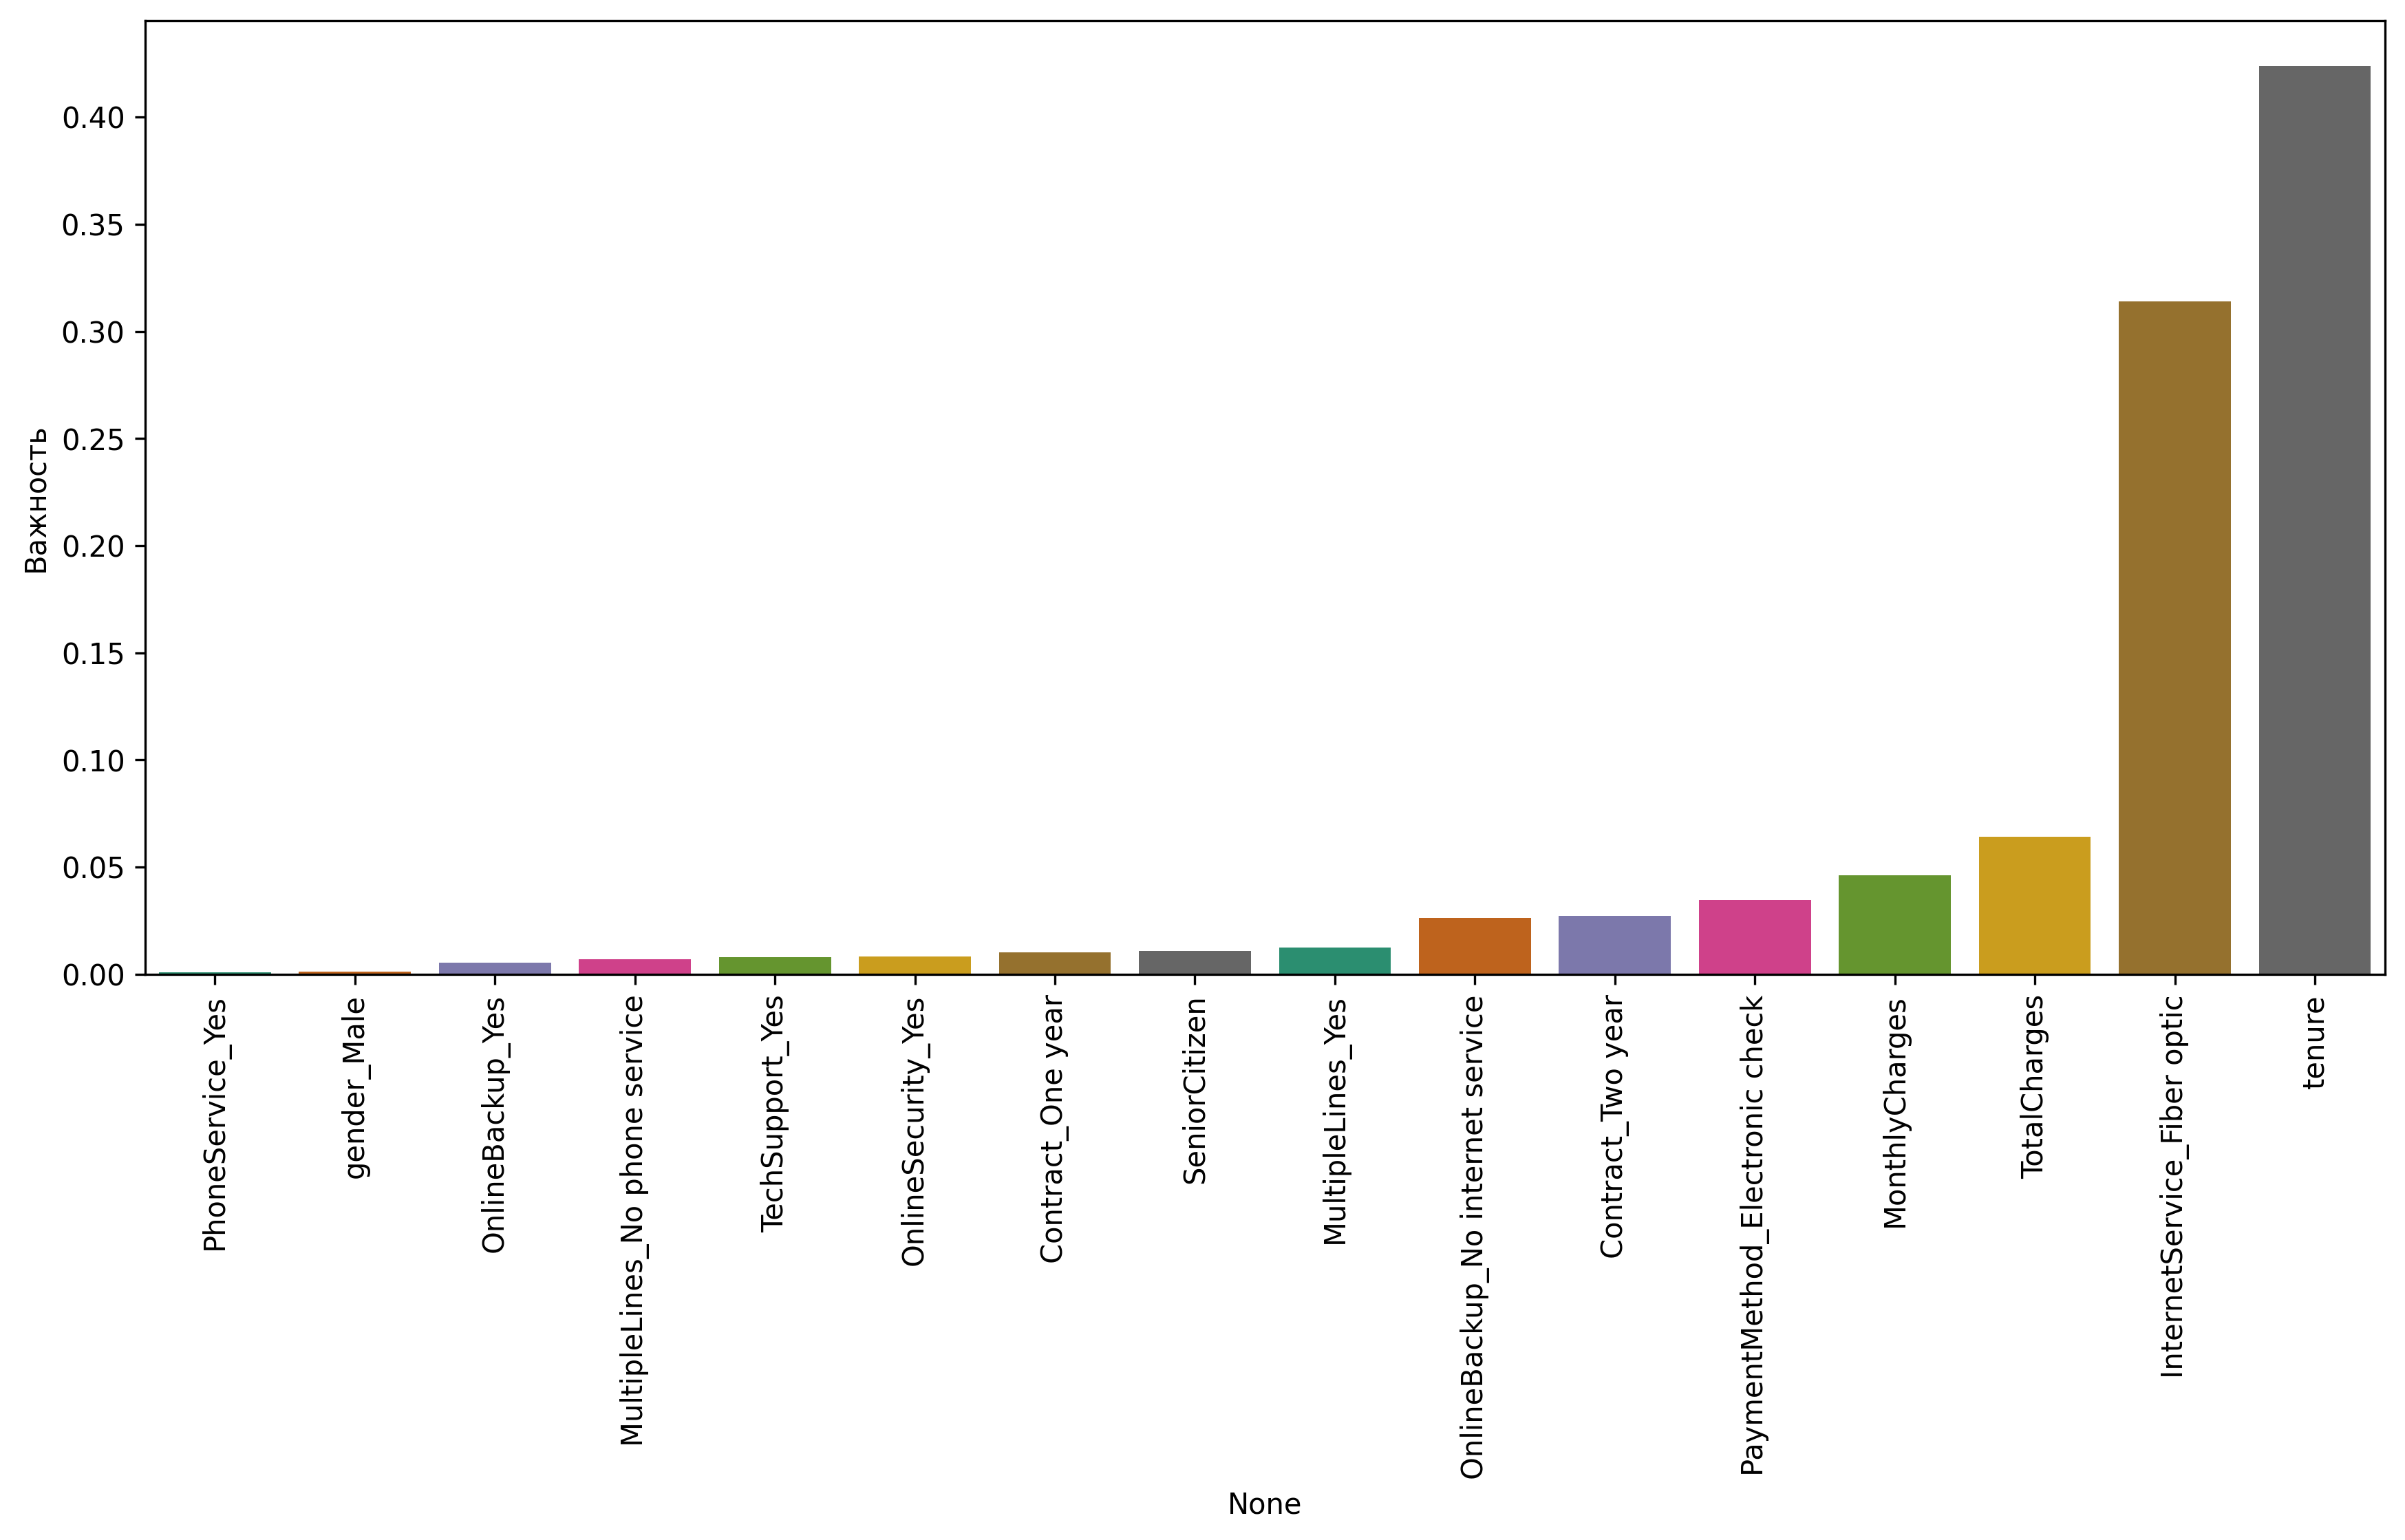

In [53]:
plt.figure(figsize=(14, 6), dpi=300)
sns.barplot(data=imp_feats, x=imp_feats.index, y='Важность', palette="Dark2")
plt.xticks(rotation=90);

## Ранее мы видели, что признак 'tenure' хорошо коррелирует с целевой переменной. Однако, есть ещё один интересный признак 'Internetservice_Fiber optic', который ранее не встречали нигде в исследовании. В этом случае нужно выяснять отдельно, почему клиенты, которые нуждаются в интернете по оптоволокну, могут уходить в отток. Возможно у кампании Telco выше цены, чем у конкурентов, именно по этой услуге.

## Сделаем визуализацию дерева решений

In [54]:
from sklearn.tree import plot_tree

[Text(0.48522727272727273, 0.9285714285714286, 'x[1] <= 17.5\ngini = 0.396\nsamples = 6328\nvalue = [4606.0, 1722.0]'),
 Text(0.2375, 0.7857142857142857, 'x[10] <= 0.5\ngini = 0.497\nsamples = 2387\nvalue = [1287, 1100]'),
 Text(0.1340909090909091, 0.6428571428571429, 'x[1] <= 5.5\ngini = 0.412\nsamples = 1343\nvalue = [954, 389]'),
 Text(0.07272727272727272, 0.5, 'x[14] <= 0.5\ngini = 0.482\nsamples = 696\nvalue = [414, 282]'),
 Text(0.03636363636363636, 0.35714285714285715, 'x[0] <= 0.5\ngini = 0.5\nsamples = 421\nvalue = [207, 214]'),
 Text(0.01818181818181818, 0.21428571428571427, 'x[2] <= 55.225\ngini = 0.499\nsamples = 370\nvalue = [194, 176]'),
 Text(0.00909090909090909, 0.07142857142857142, 'gini = 0.5\nsamples = 298\nvalue = [145, 153]'),
 Text(0.02727272727272727, 0.07142857142857142, 'gini = 0.435\nsamples = 72\nvalue = [49, 23]'),
 Text(0.05454545454545454, 0.21428571428571427, 'x[2] <= 29.175\ngini = 0.38\nsamples = 51\nvalue = [13, 38]'),
 Text(0.045454545454545456, 0.071

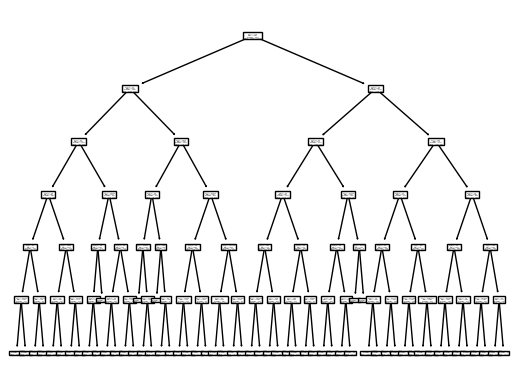

In [55]:
plot_tree(dt)

## Дерево решений получилось достаточно громоздким. Следует сказать, что для таких деревьев такая визуализация может оказаться избыточной для принятия бизнес-решений. Возможно имеет смысл посмотреть только на самые первые узлы разбиения данных, чтобы понять наиболее критичные признаки, по которым разбиваются данные.

## СЛУЧАЙНЫЙ ЛЕС (Random Forest)

## Построим модель Random Forest, оценим её работу и выполним её обучение

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier(max_depth=6)

In [58]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [59]:
preds = rf.predict(X_test)

In [60]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.86      0.92      0.89       557
         Yes       0.61      0.45      0.52       147

    accuracy                           0.82       704
   macro avg       0.73      0.69      0.70       704
weighted avg       0.81      0.82      0.81       704



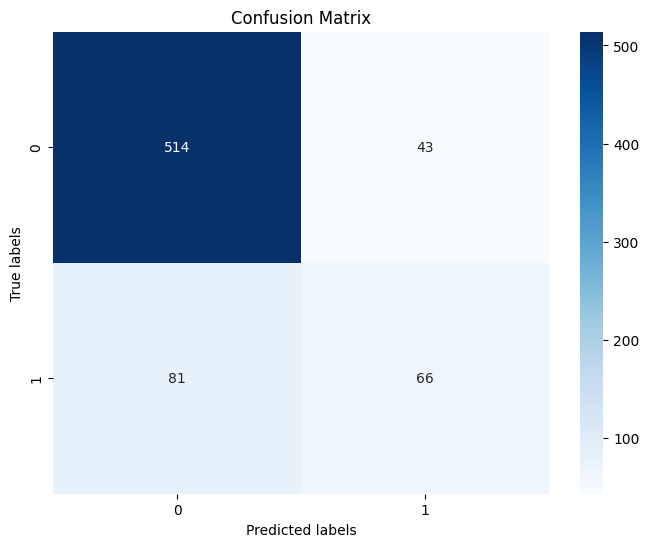

In [61]:
conf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

## Видно, что эта модель работает немного хуже чем  модель "Decision Tree"(важно счесть, какая метрика учитывается и сравнивается). Причина в том, что дерево решений получилось слишком глубоким, и из-за этого модель может получится переобученной(overfitting), т.е. хорошо работать на обученных данных и плохо работать на тестовых данных. Поэтому в определённых ситуациях полезно ограничивать глубину дерева(max_depth).

## В матрице ошибок (Confusion Matrix) мы видим интересную картину. Эта модель имеет более высокие метрики accuracy и precision с поправкой на ограничение(max_depth=6). Однако, если опираться на нашу задачу, то мы хотим минимизировать количество тех абонентов, которые по факту ушли в отток, но наша модель думает, что они не уйдут в отток. В данной матрице ошибок это значение равно 80, хотя раньше это значение было равно 75 для модели одного дерева. И за это число отвечает метрика recall, и эту метрику нам необходимо минимизировать. Вывод: модель случайного леса показывает худшее значение метрики recall, чем модель дерево решений.

## РАСШИРЯЕМЫЕ ДЕРЕВЬЯ (Boosted Trees)

## Создадим модель AdaBoost и Gradient Boosting, оценим их работу и выполним обучение.

In [62]:
from sklearn.ensemble import  AdaBoostClassifier

In [63]:
ada_model = AdaBoostClassifier(n_estimators=118)

In [64]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=118)

In [65]:
ada_preds = ada_model.predict(X_test)

In [66]:
print(classification_report(y_test, ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.52      0.57       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



In [67]:
ada_model.feature_importances_

array([0.00847458, 0.16949153, 0.22033898, 0.43220339, 0.        ,
       0.        , 0.        , 0.00847458, 0.00847458, 0.01694915,
       0.02542373, 0.        , 0.        , 0.01694915, 0.        ,
       0.        , 0.        , 0.        , 0.00847458, 0.00847458,
       0.        , 0.00847458, 0.        , 0.00847458, 0.00847458,
       0.01694915, 0.00847458, 0.        , 0.01694915, 0.00847458,
       0.        , 0.        , 0.        ])

In [68]:
ada_model.feature_importances_.argmax()

3

In [69]:
X.columns[3]

'TotalCharges'

## Получили, что в модели AdaBoost наиболее важное значение имеет признак 'TotalCharges'. И это справедливо, так как показывает сколько всего расходов понёс клиент в кампании Telco, и также данный признак достаточно хорошо коррелирует с целевой переменной 'Churn'.

## Оптимизируем модель

In [70]:
from sklearn.metrics import accuracy_score

error_rates = []

for n in range(1, 120):
    best_ada_model = AdaBoostClassifier(n_estimators=n)
    best_ada_model.fit(X_train, y_train)
    best_ada_preds = best_ada_model.predict(X_test)
    
    err = 1 - accuracy_score(y_test, best_ada_preds)
    
    error_rates.append(err)

## При увеличении количества деревьев ошибка модели должна уменьшатся.

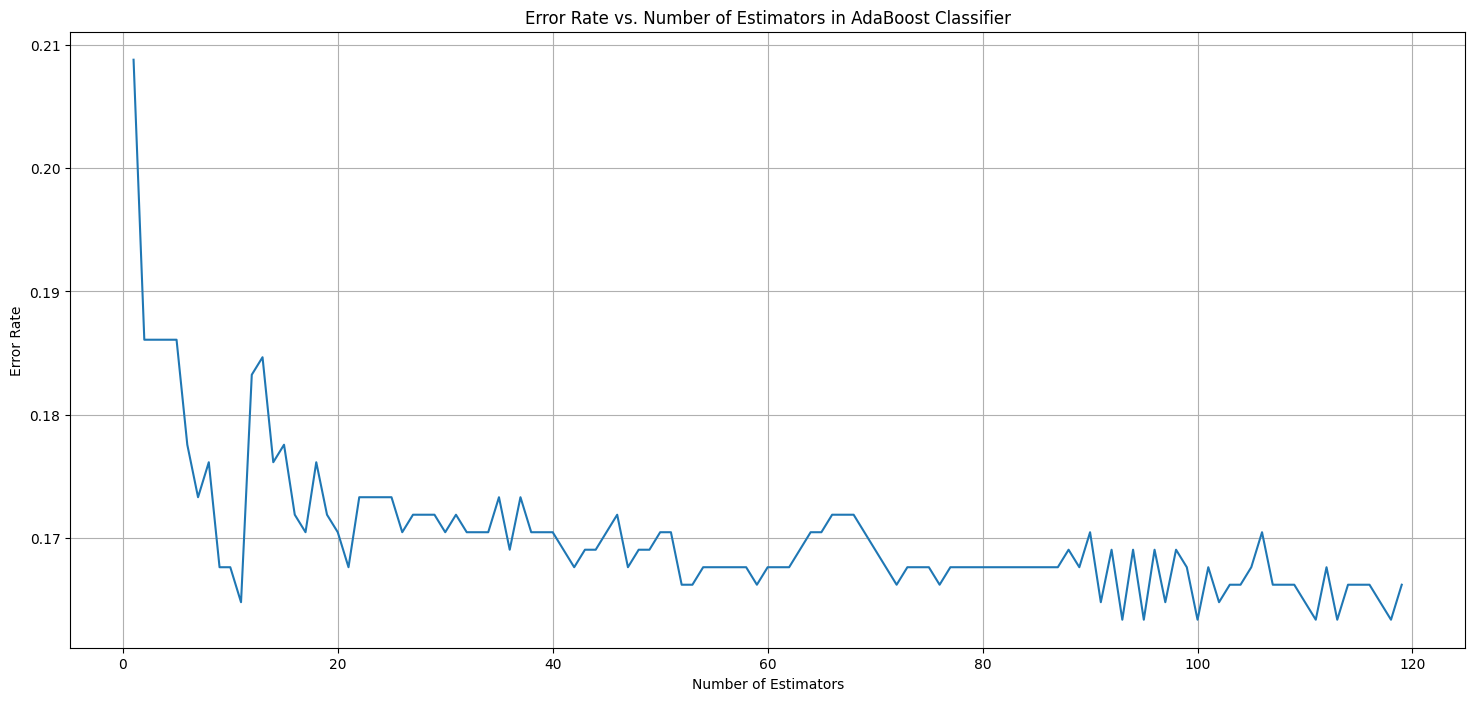

In [71]:
plt.figure(figsize=(18, 8))
plt.plot(range(1, 120), error_rates)
plt.title('Error Rate vs. Number of Estimators in AdaBoost Classifier')
plt.xlabel('Number of Estimators')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show();

##  По графику оптимальное значение ошибки находится где-то в районе 118. Это значение мы и указали при обучении модели выше.

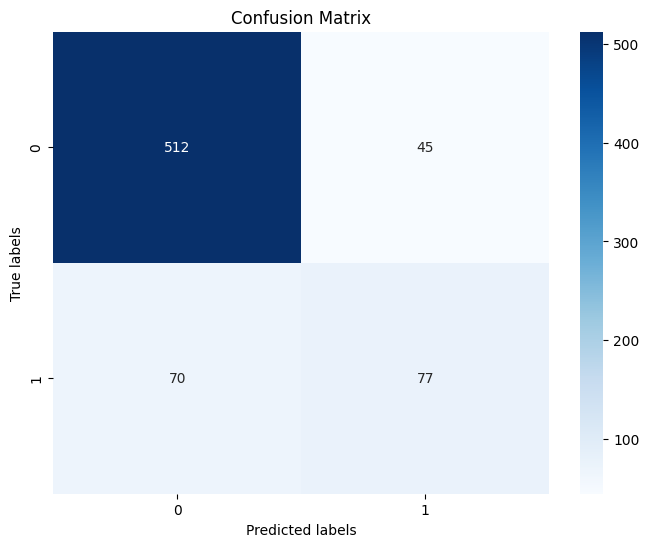

In [72]:
conf_matrix = confusion_matrix(y_test, ada_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

## Мы уменьшили значение метрики recall. И это значение равно 70.

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid = {'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120, 130],
              'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
              'max_depth': [3, 4, 5, 6, 7, 8, 9]}

In [75]:
gb_model = GradientBoostingClassifier()

In [76]:
grid = GridSearchCV(estimator=gb_model, param_grid=param_grid)

In [77]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120,
                                          130]})

In [78]:
gb_preds = grid.predict(X_test)

In [79]:
grid.best_estimator_

GradientBoostingClassifier(n_estimators=80)

In [80]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 80}

In [81]:
print(classification_report(y_test, gb_preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.59      0.51      0.55       147

    accuracy                           0.82       704
   macro avg       0.73      0.71      0.72       704
weighted avg       0.81      0.82      0.82       704



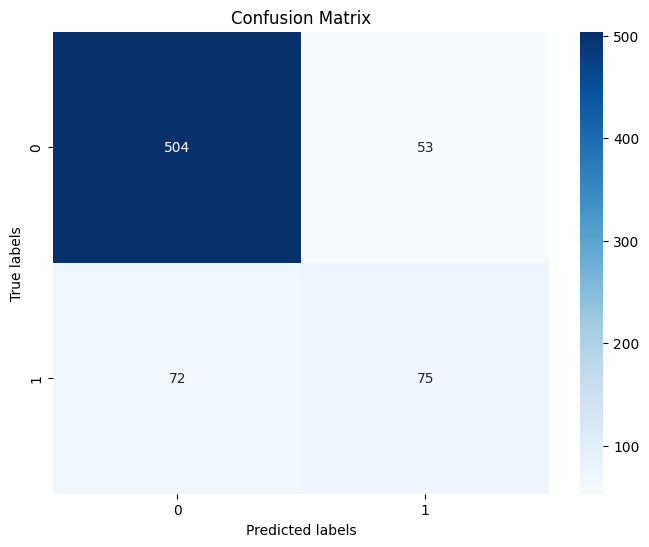

In [82]:
conf_matrix = confusion_matrix(y_test, gb_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

## Если сделаем вывод, то можно сказать, что модель Adaboost с использованием гиперпараметров работает чуть хуже чем модель расширяемые деревья. 


## Модель логистической регрессии

## Построим модель логистической регрессии

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

In [84]:
scaler = StandardScaler()

In [85]:
scaled_X_train = scaler.fit_transform(X_train)

In [86]:
scaleed_X_test = scaler.transform(X_test)

In [87]:
log_model = LogisticRegressionCV()

In [88]:
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

## Посмотрим на оптимальные значения логистической регрессии

In [89]:
log_model.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [90]:
log_model.C_#выбор наилучшего значения

array([0.04641589])

In [91]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

## Посмотрим на коэффициенты модели

In [92]:
log_model.coef_

array([[ 8.50978351e-02, -7.35111542e-01,  1.29221171e-01,
        -1.56351333e-02,  4.79987953e-04, -1.50747632e-02,
        -4.43580136e-02, -8.03040647e-02,  8.03040647e-02,
         1.30196342e-01,  3.91037246e-01, -4.17105411e-02,
        -4.17105411e-02, -1.79349219e-01, -4.17105411e-02,
        -6.87981541e-02, -4.17105411e-02, -4.86559668e-04,
        -4.17105411e-02, -1.56171995e-01, -4.17105411e-02,
         1.17666197e-01, -4.17105411e-02,  9.53287254e-02,
        -2.96495051e-01, -5.95550305e-01,  1.66288540e-01,
        -4.32903180e-02,  1.47591543e-01, -2.23400002e-02,
        -1.67639596e-01, -1.51422564e-01, -1.83869135e-02]])

In [93]:
coefs = pd.Series(index=X.columns, data=log_model.coef_[0]).sort_values()
coefs

tenure                                  -0.735112
Contract_Two year                       -0.595550
Contract_One year                       -0.296495
OnlineSecurity_Yes                      -0.179349
Tenure Cohort_12-24 месяцев             -0.167640
TechSupport_Yes                         -0.156172
Tenure Cohort_24-48 месяцев             -0.151423
PhoneService_Yes                        -0.080304
OnlineBackup_Yes                        -0.068798
Dependents_Yes                          -0.044358
PaymentMethod_Credit card (automatic)   -0.043290
DeviceProtection_No internet service    -0.041711
OnlineBackup_No internet service        -0.041711
StreamingMovies_No internet service     -0.041711
InternetService_No                      -0.041711
StreamingTV_No internet service         -0.041711
OnlineSecurity_No internet service      -0.041711
TechSupport_No internet service         -0.041711
PaymentMethod_Mailed check              -0.022340
Tenure Cohort_Более 48 месяцев          -0.018387


In [94]:
y_pred = log_model.predict(scaleed_X_test)

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.91      0.89       557
         Yes       0.61      0.50      0.55       147

    accuracy                           0.83       704
   macro avg       0.74      0.71      0.72       704
weighted avg       0.82      0.83      0.82       704



## Построим график "ROC Curve"

In [96]:
from sklearn.metrics import roc_curve, RocCurveDisplay

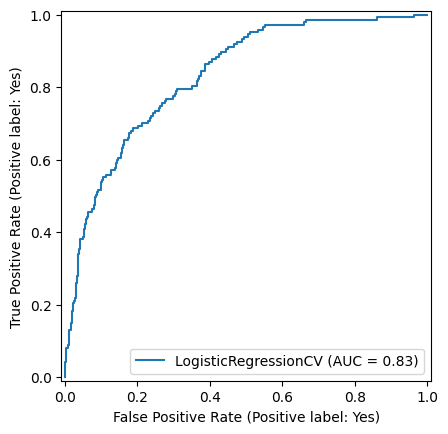

In [97]:
RocCurveDisplay.from_estimator(log_model, scaleed_X_test, y_test);

## LogisticRegressionCV(AUC=0.83) в нашем случае означает, что была применена модель логистической регрессии с кросс-валидацией, и значение площади под кривой ROC (AUC) для данной модели составляет 0.83. AUC является метрикой, которая измеряет качество классификационной модели, где значение ближе к 1 указывает на более точную модель. Таким образом, значение AUC=0.83 указывает на хорошее качество модели логистической регрессии.

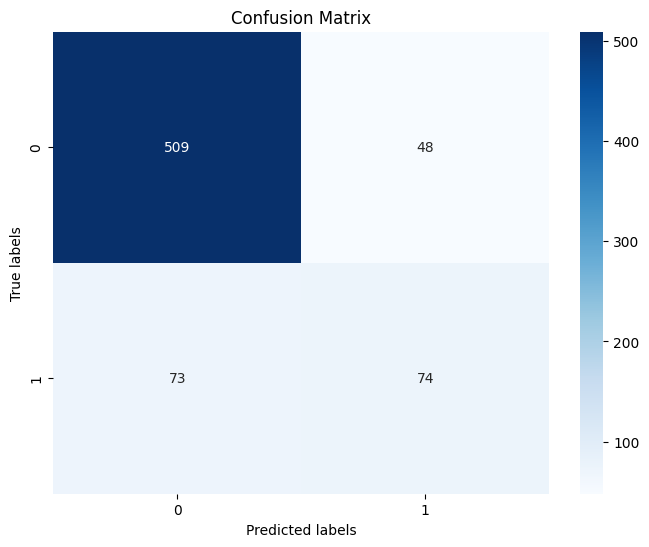

In [98]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

## Видно что логистическая регрессия немного хуже отрабатывает, чем модель AdaBoost. Метрика recall равна 73. Ранее наилучшее значение мы получали 70.

## Метод опорных векторов(SVM)

In [99]:
from sklearn.svm import SVC

In [100]:
svc = SVC(class_weight='balanced')

In [101]:
param_grid = {'C':[0.001, 0.01, 0.1, 0.5, 1]}

In [102]:
grid = GridSearchCV(svc, param_grid)

In [103]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]})

In [106]:
grid.best_params_

{'C': 1}

In [107]:
grid_preds = grid.predict(scaleed_X_test)

In [108]:
confusion_matrix(y_test, grid_preds)

array([[410, 147],
       [ 37, 110]])

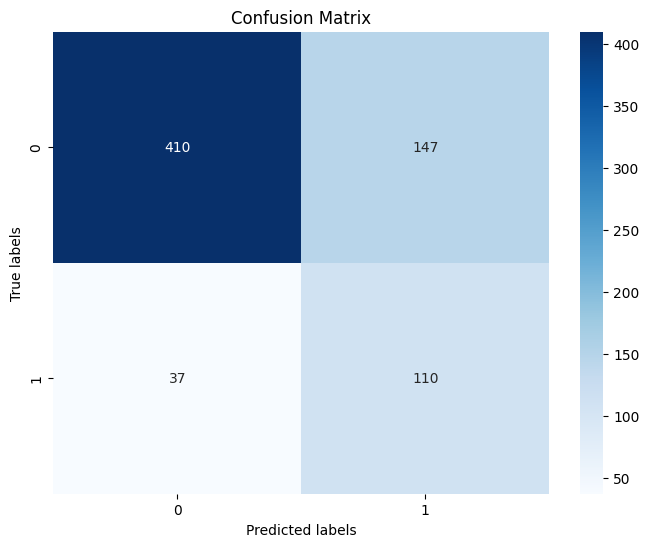

In [109]:
conf_matrix = confusion_matrix(y_test, grid_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

In [110]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

          No       0.92      0.74      0.82       557
         Yes       0.43      0.75      0.54       147

    accuracy                           0.74       704
   macro avg       0.67      0.74      0.68       704
weighted avg       0.82      0.74      0.76       704



## Мы получили наилучшее значение recall равной 37. Уменьшили ошибку предсказания для этой метрики почти в 2 раза, по сравнению с предыдущими моделями

## Метод К-ближайших соседей(KNN)

In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
knn = KNeighborsClassifier()

## Создадим пайплайн для данной модели

In [113]:
from sklearn.pipeline import Pipeline

In [114]:
operations = [('scaler', scaler), ('knn', knn)]

In [115]:
pipe = Pipeline(operations)

In [116]:
k_values = list(range(1, 30))

In [117]:
param_grid = {'knn__n_neighbors': k_values}

In [118]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [119]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [120]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=28))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=28),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 28,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [121]:
pd.DataFrame(full_cv_classifier.cv_results_).head()


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.008166      0.001887         0.033013        0.008638   
1       0.007286      0.000194         0.029410        0.000306   
2       0.007051      0.000215         0.033983        0.006227   
3       0.007751      0.000189         0.039827        0.001099   
4       0.007426      0.000263         0.031939        0.001291   

  param_knn__n_neighbors                   params  split0_test_score  \
0                      1  {'knn__n_neighbors': 1}           0.729068   
1                      2  {'knn__n_neighbors': 2}           0.756714   
2                      3  {'knn__n_neighbors': 3}           0.761453   
3                      4  {'knn__n_neighbors': 4}           0.782780   
4                      5  {'knn__n_neighbors': 5}           0.771722   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.728278           0.703002           0.715415           0.713043   
1           0.757504           0.747235           0.746245           0.762846   
2           0.750395           0.729068           0.760474           0.760474   
3           0.770142           0.748815           0.760474           0.769960   
4           0.753555           0.754344           0.756522           0.762846   

   mean_test_score  std_test_score  rank_test_score  
0         0.717761        0.009839               29  
1         0.754109        0.006383               27  
2         0.752373        0.012335               28  
3         0.766435        0.011308               24  
4         0.759798        0.006796               26

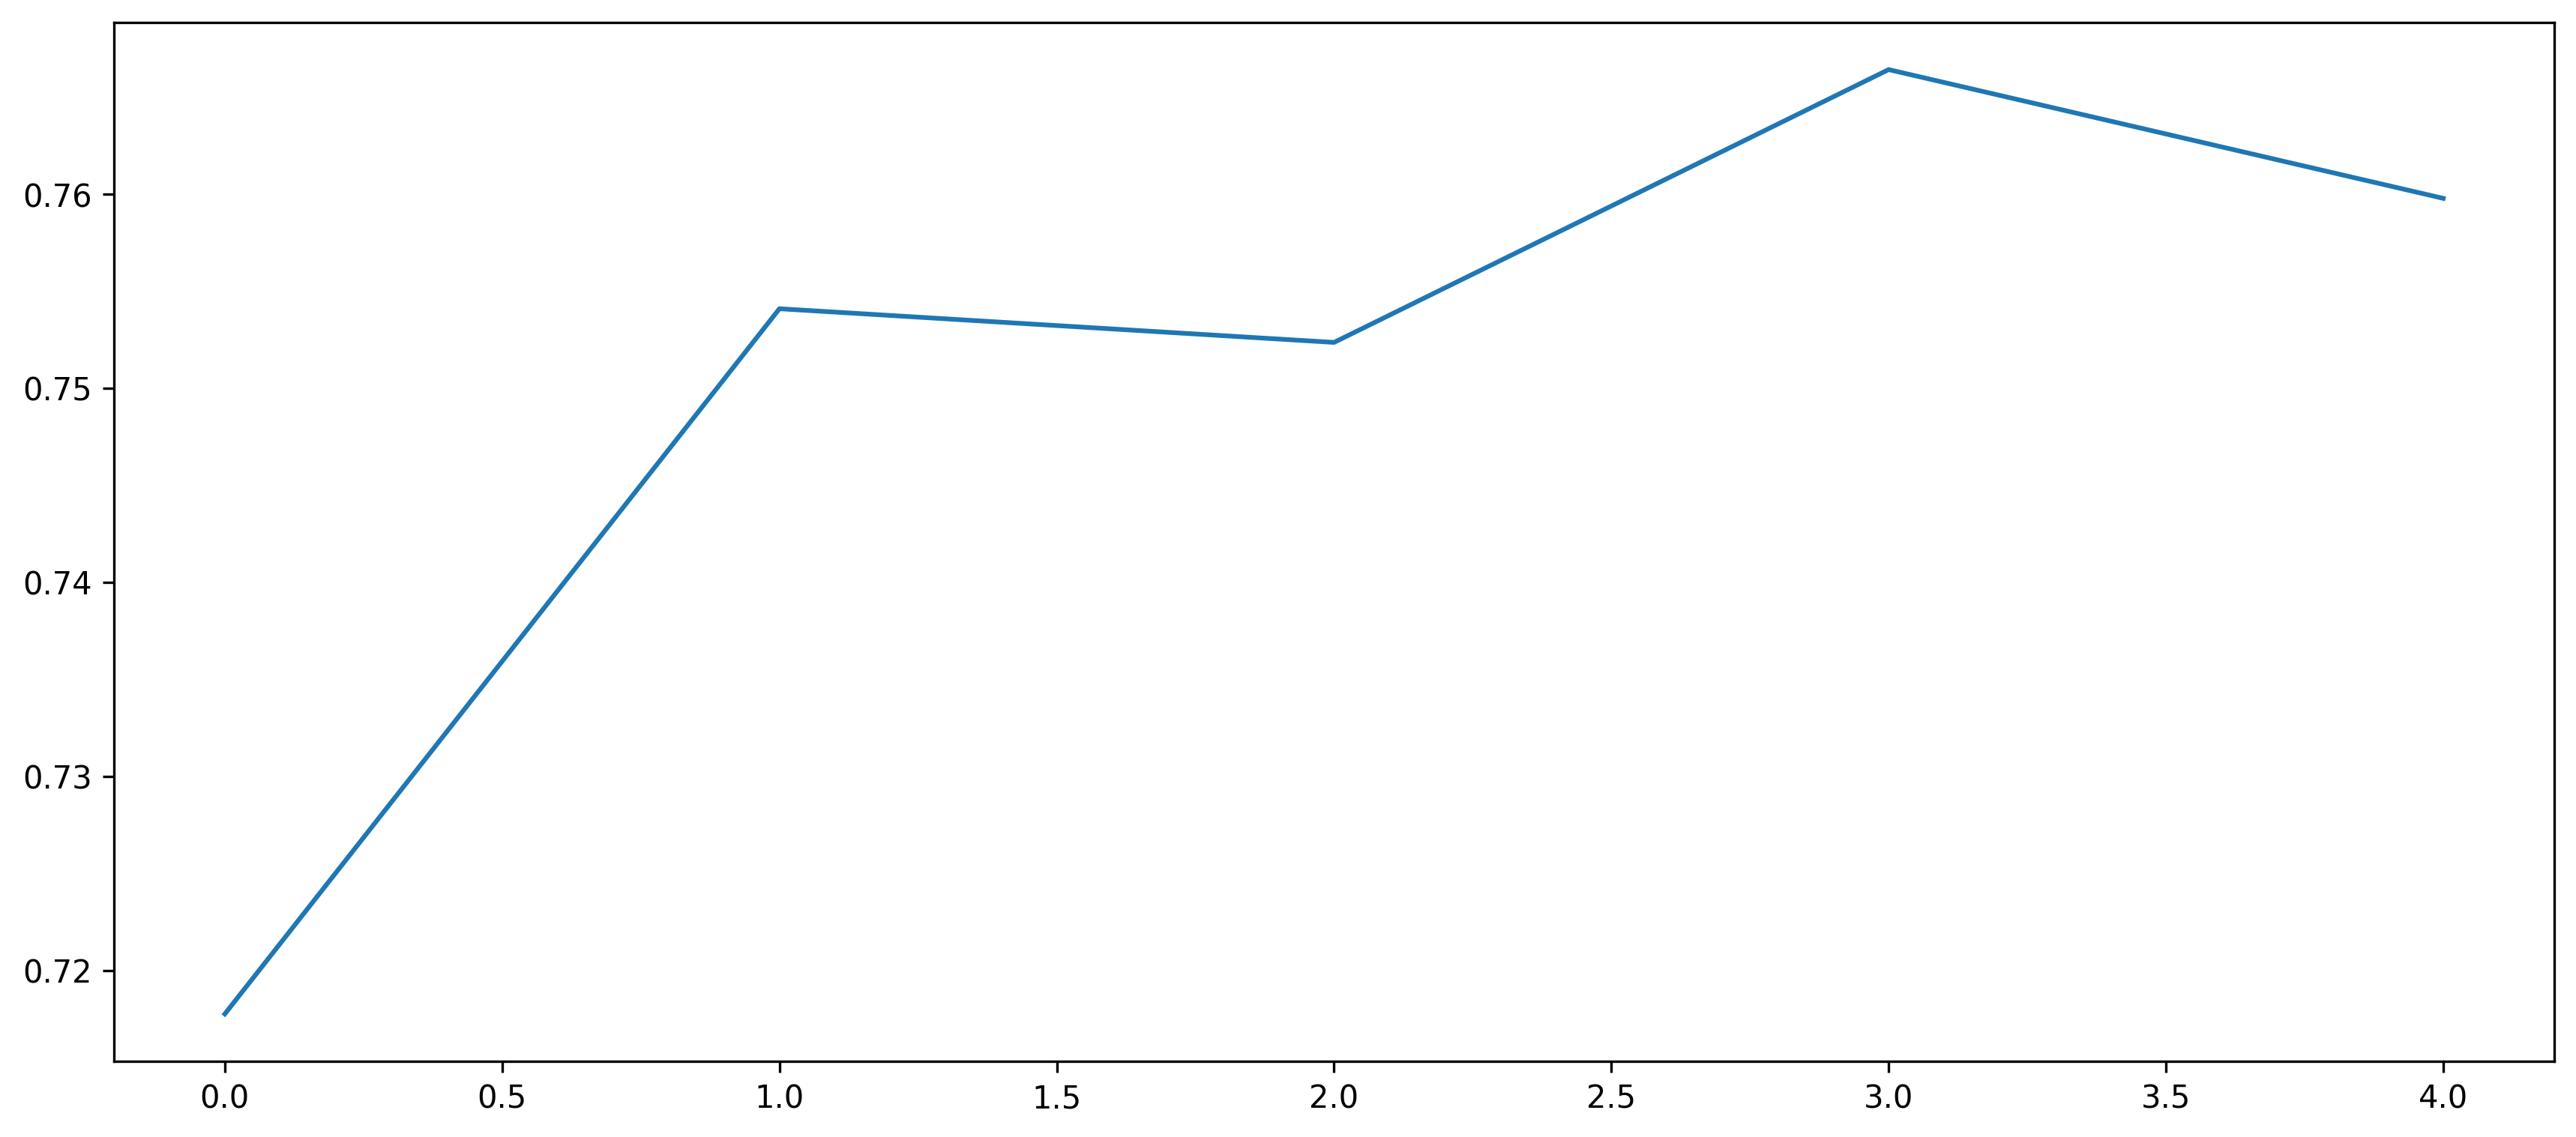

In [122]:
plt.figure(figsize=(14, 6), dpi=300)
pd.DataFrame(full_cv_classifier.cv_results_).head()['mean_test_score'].plot();

In [123]:
knn_pred = full_cv_classifier.predict(X_test)

In [124]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.50      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.70      0.70       704
weighted avg       0.80      0.81      0.81       704



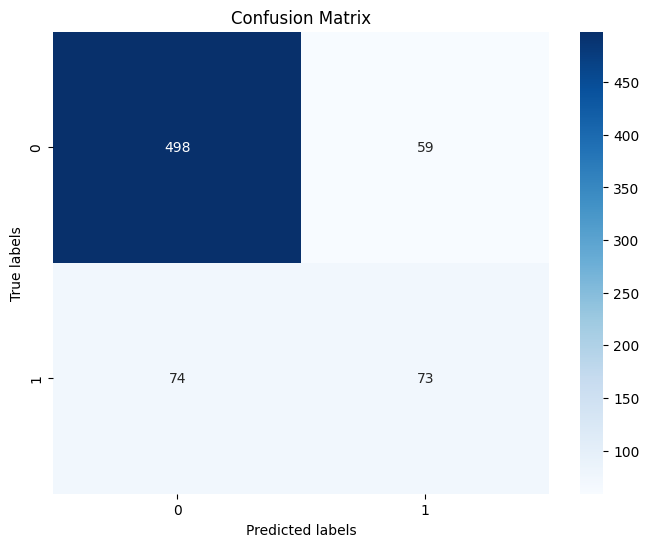

In [125]:
conf_matrix = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

## Значение recall получилось достаточно большим. Это хуже, чем у многих ранее рассмотренных моделей.

## Было выясненно, что наибольшее влияние на отток клиентов влияет показатель TotalCharges(общие расходы), и больше оттока наблюдается на краткосрочных контрактах. В связи с этим, кампании Telco рекомендуется пересмотреть условия краткосрочных контрактов(меньше года), чтобы удержать абонентов у себя. Исходя из этого, следует разработать некоторые мероприятия, которые удовлетворяли бы клиентов на контрактах меньше года. 

## Наилучшей моделью для предсказания оказалась в нашем случае 'Метод опорных векторов(SVM)'.

## Модель для предсказания того, уйдут ли клиенты в оеток готова и можно её внедрять в продакшн. Можно это сделать разными способами. Рассмотрим один из них:

## Используем файл с расширением .pickle.

In [126]:
import pickle

In [127]:
# Выбор наилучшей модели
svc = SVC(class_weight='balanced')
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1]}
grid = GridSearchCV(svc, param_grid)
grid.fit(scaled_X_train, y_train)
# Сохранение модели в файл
with open('model.pickle', 'wb') as file:
    pickle.dump(grid, file)

## Для загрузки модели из файла в будущем, можно использовать pickle.load():

In [129]:
with open('model.pickle', 'rb') as file:
    loaded_model = pickle.load(file)
# Теперь можно использовать загруженную модель для предсказаний
grid_preds = loaded_model.predict(scaleed_X_test)

##  Таким образом, можно сохранять обученную модель в файл и затем загружать её для использования в продакшене.